# Исследование данных о российском кинопрокате



# Введение

**Заказчик исследования:**  
Министерство культуры Российской Федерации.  

**Цель исследования:**  
Изучить рынок российского кинопроката и выявить текущие тренды.  
Особое внимание в ходе исследования будет уделено фильмам, которые получили государственную поддержку.  

**Ход исследования:**  
- Первым шагом будет произведена преобработка данных и подготовка их к исследовательскому анализу.  
- На этапе общего исследовательского анализа данных, мы изучим динамику выхода фильмов в прокат в период 2010-2019 года; сборы, которые получили кинокартины, вышедшие в прокат в кинотеатрах в период 2015-2019 года; а также влияние возрастного ограничения на размер кассовых сборов.  
- Следующим шагом уделим внимание непосредственно фильмам, получившим государственную поддержку в период с 2013 по 2019 года. Изучим кассовые сборы, величину денежных средств, вложенных государством, а также степень их возврата; исследуем различия между кинокартинами, которые были профинансированы Министерством Культуры и кинокартинами, получившими деньги от Фонд кино; изучим рейтинг фильмов, получивших государственную поддержку и его взаимозависимость от различных факторов

**Описание данных:**  
Данные взяты с [портала открытых данных Министерства культуры](http://opendata.mkrf.ru/). Набор данных содержит информацию о прокатных удостоверениях, сборах и государственной поддержке фильмов, а также информацию с сайта КиноПоиск.  

Таблица `mkrf_movies` содержит информацию из реестра прокатных удостоверений. Таблица содержит следующие столбцы:
- `title` — название фильма;
- `puNumber` — номер прокатного удостоверения. (У одного фильма может быть несколько прокатных удостоверений);
- `show_start_date` — дата премьеры фильма;
- `type` — тип фильма;
- `film_studio` — студия-производитель;
- `production_country` — страна-производитель;
- `director` — режиссёр;
- `producer` — продюсер;
- `age_restriction` — возрастная категория;
- `refundable_support` — объём возвратных средств государственной поддержки;
- `nonrefundable_support` — объём невозвратных средств государственной поддержки;
- `financing_source` — источник государственного финансирования;
- `budget` — общий бюджет фильма (уже включает в себя полный объём государственной поддержки. Данные в этом столбце указаны только для тех фильмов, которые получили государственную поддержку.);
- `ratings` — рейтинг фильма на КиноПоиске;
- `genres` — жанр фильма.   

Таблица `mkrf_shows` содержит сведения о показах фильмов в российских кинотеатрах.
- `puNumber` — номер прокатного удостоверения;
- `box_office` — сборы в рублях.  

## Шаг 0. Подготовка окружения и импорт необходимых библиотек

Для начала обновим бибилиотеку `seaborn`, чтобы получить доступ к новым графикам, недоступным в старой версии.

In [1]:
!pip install seaborn -U

Defaulting to user installation because normal site-packages is not writeable
Requirement already up-to-date: seaborn in /home/jovyan/.local/lib/python3.7/site-packages (0.11.2)


Импортируем все необходимые библиотеки

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re

import warnings
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")
warnings.simplefilter(action='ignore', category=FutureWarning)

pd.set_option('display.max_columns', None) # Зададим настройку pandas отображать все столбцы
pd.set_option('display.max_rows', None) # Зададим настройку pandas отображать все строки (нам это может понадобиться)
pd.set_option('mode.chained_assignment', None) # Зададим pandas настройку не отображать предупреждения по поводу присваивания каких-либо значений копии среза 

## Шаг 1. Откроем файлы с данными и объединим их в один датафрейм. 

Объедините данные таким образом, чтобы все объекты из датасета `mkrf_movies` обязательно вошли в получившийся датафрейм. 

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_0" aria-expanded="false" aria-controls="collapseHint_0">Подсказка</button>
        </div>
        <div id="collapseHint_0" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Обратите внимание на тип данных столбца, по которому будете соединять датафреймы. Тип данных этих столбцов должен быть одинаковым в обоих датафреймах.
            </div>
        </div>
    </div>
</div>

### Прочитаем данные

Прочитаем данные и сохраним в переменные `mkrf_movies` и `mkrf_shows`.

In [3]:
mkrf_movies = pd.read_csv('/datasets/mkrf_movies.csv')
mkrf_shows = pd.read_csv('/datasets/mkrf_shows.csv')

Посмотрим на датафрейм `mkrf_movies`

In [4]:
mkrf_movies.head(3)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама"
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный"
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"


In [5]:
mkrf_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
title                    7486 non-null object
puNumber                 7486 non-null object
show_start_date          7486 non-null object
type                     7486 non-null object
film_studio              7468 non-null object
production_country       7484 non-null object
director                 7477 non-null object
producer                 6918 non-null object
age_restriction          7486 non-null object
refundable_support       332 non-null float64
nonrefundable_support    332 non-null float64
budget                   332 non-null float64
financing_source         332 non-null object
ratings                  6519 non-null object
genres                   6510 non-null object
dtypes: float64(3), object(12)
memory usage: 877.4+ KB


Интересно, почему столбец `ratings` хранится не во `float` формате. Посмотрим на уникальные значения столбца.

In [6]:
mkrf_movies.ratings.unique()

array(['7.2', '6.6', '6.8', '7.7', '8.3', '8.0', '7.8', '8.1', '7.1',
       '6.0', '7.4', '5.8', '8.7', '6.3', '6.9', '5.0', '4.3', '7.3',
       '7.0', '6.4', nan, '8.2', '7.5', '6.7', '7.9', '5.9', '6.2', '5.6',
       '6.5', '2.4', '7.6', '6.1', '8.6', '8.5', '8.8', '5.5', '5.1',
       '5.7', '5.4', '99%', '4.4', '4.5', '5.3', '4.1', '8.4', '2.6',
       '3.8', '4.6', '4.8', '4.0', '3.0', '1.6', '4.2', '5.2', '4.7',
       '4.9', '3.9', '2.7', '3.3', '2.9', '28%', '3.7', '1.4', '3.1',
       '97%', '3.5', '3.2', '2.8', '1.5', '2.1', '2.5', '9.2', '3.4',
       '1.1', '3.6', '83%', '64%', '91%', '94%', '62%', '79%', '90%',
       '19%', '88%', '1.0', '89%', '1.3', '1.9', '1.8', '1.2', '1.7',
       '9.0', '98%', '8.9', '9.1'], dtype=object)

Помимо рейтинга в этом столбце хранятся значения в процентах. Обычно такие значения указываются для фильмов, которые еще не вышли в прокат, т.н. "рейтинг ожидания", однако может быть и иное. Более подробно расссмотрим этот вопрос на этапе предобработки.

Посмотрим, есть ли в данных явные дубликаты.

In [7]:
mkrf_movies.duplicated().sum()

0

Явных дубликатов нет.

Посмотрим на датафрейм `mkrf_shows`

In [8]:
mkrf_shows.head()

,puNumber,box_office
0,111000113,2.450000e+03
1,111000115,6.104000e+04
2,111000116,1.530300e+08
3,111000117,1.226096e+07
4,111000118,1.636841e+08


In [9]:
mkrf_shows.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
puNumber      3158 non-null int64
box_office    3158 non-null float64
dtypes: float64(1), int64(1)
memory usage: 49.5 KB


Посмотрим, есть ли в данных явные дубликаты.

In [10]:
mkrf_shows.duplicated().sum()

0

Явных дубликатов нет.

**Краткое резюме**

Файл `mkrf_movies` содержит 7486 строк и 15 столбцов. Присутствуют пропуски.    
Файл `mkrf_shows` содержит 3158 строк и 2 столбца. Пропуски отсутствуют.  
Явные дубликаты в таблицах отсутсвуют.

### Объеденим данные в 1 датафрейм

Чтобы объеденить данныев 1 датафрейм по общему столбцу, приведем этот столбец к общему формату. Это столбец `puNumnber`

Для начала посмотрим, в чем причина того, что столбец хранится в формате `object`. Какие значения еще хранятся в этом стобце, кроме числовых?

In [11]:
# Выведем уникальные значения, которые не содердат в строке только цифры.
mkrf_movies[~mkrf_movies['puNumber'].str.isdigit()]['puNumber'].unique()

array([' 111004112', 'нет'], dtype=object)

У нас есть числовое значение с пробелом. Есть фильм, для которого не указан номер прокатного удостоверения (значение "нет").  
Для начала исправим числовое значение с пробелами.  

In [12]:
mkrf_movies.loc[:, 'puNumber'] = mkrf_movies.puNumber.str.strip()

Посмотрим, что осталось:

In [13]:
mkrf_movies[~mkrf_movies['puNumber'].str.isdigit()]['puNumber'].unique()

array(['нет'], dtype=object)

Осталось значение "нет".  
Следующим шагом изменим формат столбца на числовой методом `pd.to_numeric`, которые позволяет обрабатывать ошибки. (если мы вызовем `astype('int)`, то строковое значение "нет" вызовет ошибку.)  
Формат, который мы получим будет `float`, так как в нем будет значение `nan`. Поэтому следующим шагом мы заполним это значение нулем, и преобразуем столбец в формат `int` методом `astype('int')`

In [14]:
mkrf_movies.loc[:, 'puNumber'] = pd.to_numeric(mkrf_movies.puNumber, errors='coerce').fillna(0).astype('int')
mkrf_movies.puNumber.dtype #проверим формат столбца после преобразования

dtype('int64')

Теперь все в порядке. Можно объединять.  

Сохраним получившийся датафрейм в переменную `data`

In [15]:
data = mkrf_shows.merge(mkrf_movies, on='puNumber', how='right')

In [16]:
# Выведем на экран информацию о новом датафрейме data
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
puNumber                 7486 non-null int64
box_office               3158 non-null float64
title                    7486 non-null object
show_start_date          7486 non-null object
type                     7486 non-null object
film_studio              7468 non-null object
production_country       7484 non-null object
director                 7477 non-null object
producer                 6918 non-null object
age_restriction          7486 non-null object
refundable_support       332 non-null float64
nonrefundable_support    332 non-null float64
budget                   332 non-null float64
financing_source         332 non-null object
ratings                  6519 non-null object
genres                   6510 non-null object
dtypes: float64(4), int64(1), object(11)
memory usage: 994.2+ KB


### Краткое резюме

У нас получился датафрейм, который содердит 16 столбцов и 7486 строк.  
Данные хранятся в трех форматах: `float64`, `int64`, `object`  
В данных есть пропуски.

## Шаг 2. Предобработка данных

### Шаг 2.1. Проверим типы данных

- *Проверьте типы данных в датафрейме и преобразуйте их там, где это необходимо.*

На данном этапе посмотрим, какие значения хранятся в стобцах каждого типа данных и преобразуем их в наиболее оптимальный формат там, где это необходимо.

#### Тип `float64`

Посмотрим на столбцы, которые хранят данные в формате `float64`

In [17]:
# Сохраним в переменную columns_float названия столбцов с данными в формате 'float'
columns_float = data.select_dtypes('float64').columns

# Выведем эти столбцы на экран
data[columns_float].head()

,box_office,refundable_support,nonrefundable_support,budget
0,2.450000e+03,NaN,NaN,NaN
1,6.104000e+04,0.0,34000000.0,49280496.0
2,1.530300e+08,20000000.0,20000000.0,78686500.0
3,1.226096e+07,7000000.0,20000000.0,45483233.0
4,1.636841e+08,NaN,NaN,NaN


Посмотрим описание данных для столбцов с данными в формате `float`

In [18]:
# Сохраним датафрейм с описание даннных в переменную 'data_float_describe'
table_float_describe = data[columns_float].describe() 

# Для удобство восприятия больших чисел, немного изменим формат отображения.
for col in table_float_describe.columns:
    table_float_describe[col] = table_float_describe[col].apply("{:,.0f}".format)

# Выведем 'data_float_describe' на экран
table_float_describe

,box_office,refundable_support,nonrefundable_support,budget
count,"3,158",332,332,332
mean,"76,478,696","11,864,458","48,980,989","127,229,717"
std,"240,353,123","24,916,555","59,980,118","188,588,333"
min,0,0,0,0
25%,"86,239",0,"25,000,000","42,000,000"
50%,"2,327,988",0,"30,000,000","68,649,916"
75%,"23,979,671","15,000,000","40,375,000","141,985,320"
max,"3,073,568,691","180,000,000","400,000,000","2,305,074,303"


В целом видно, что большинство данных представляют из себя целые числа.  
Следовательно, они хранятся в формате `float` из-за того, что имеют внутри пропуски.  

Чтобы понять, можем ли мы заменить пропуски на 0, нужно разобраться в их причине.  
Из исходных данных мы знаем, что значение в столбце `budget` указано только для фильмов, получивших государственную поддержку. Следовательно, если государственная поддержка не получена, то и в `budget` и в `refundable_support`, `nonrefundable_support` будут храниться пропуски.  

Следовательно, в столбцах `budget`, `refundable_support`, `nonrefundable_support` мы можем заполнить пропуски 0 и преобразовать их в формат `int`.

Что касается столбца `box_office`, то здесь причина пропусков может состоять в том, чтоф фильм не выходил в прокат в кинотеатрах, а вышел на ином носителе. Данные `box_office` взяты из таблицы `mkrf_shows`, а она в свою очередь содержит лишь данные о показах фильмов в российских кинотеатрах.

На всякий случай проверим, точно ли совпадают все пропуски в столбцах `budget` и `financing_source`.

In [19]:
# Посмотрим количество пропусков в стобце 'budget'
data['budget'].isna().sum()

7154

In [20]:
# Посмотрим количество пропусков в стобце 'financing_source'
data['financing_source'].isna().sum()

7154

In [21]:
# Проверим все ли индексы сопадают
(data[data['budget'].isna()].index == data[data['financing_source'].isna()].index).sum()

7154

Все отлично, можно приступать к предобработке.

Изменим формат хранения данных `budget`, `refundable_support`, `nonrefundable_support` на `int`, предварительно заполнив пропуски нулями.

In [22]:
for col in ['budget', 'refundable_support', 'nonrefundable_support']:
    data.loc[:, col] = data[col].fillna(0).astype('int')

Проверим результат преобразования:

In [23]:
data[['budget', 'refundable_support', 'nonrefundable_support']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 3 columns):
budget                   7486 non-null int64
refundable_support       7486 non-null int64
nonrefundable_support    7486 non-null int64
dtypes: int64(3)
memory usage: 233.9 KB


In [24]:
data[['refundable_support', 'nonrefundable_support', 'budget']].head()

,refundable_support,nonrefundable_support,budget
0,0,0,0
1,0,34000000,49280496
2,20000000,20000000,78686500
3,7000000,20000000,45483233
4,0,0,0


**Промежуточный итог:**  
- Формат хранения даннных в столбцах `refundable_support`, `nonrefundable_support`, `budget` преобразован к формату `int64`

#### Тип `int64`

In [25]:
data.select_dtypes('int64').head()

,puNumber,refundable_support,nonrefundable_support,budget
0,111000113,0,0,0
1,111000115,0,34000000,49280496
2,111000116,20000000,20000000,78686500
3,111000117,7000000,20000000,45483233
4,111000118,0,0,0


Все данные, которые хранятся в формате `int64` не требуют смены формата хранения.

**Промежуточный итог:**  
- Данные, хранящиеся в формате `int64`, в преобразовании формата не нуждаются

#### Тип `object`

Посмотрим, какие данные у нас хранятся в формате `object'

In [26]:
data.select_dtypes('object').head(3)

,title,show_start_date,type,film_studio,production_country,director,producer,age_restriction,financing_source,ratings,genres
0,Тайна перевала Дятлова,2013-01-17T12:00:00.000Z,Художественный,"ООО ""Нон-Стоп Продакшн""",Россия,Ренни Харлин,"А.Роднянский, С.Мелькумов, С.Беспалов, Киа Джэм",«16+» - для детей старше 16 лет,NaN,5.1,"ужасы,фантастика"
1,Небесный верблюд,2015-01-14T12:00:00.000Z,Художественный,"ООО Продюсерский центр ""Всё хорошо""",Россия,Ю.Фетинг,И.Плиско,«0+» - для любой зрительской аудитории,Министерство культуры,6.7,"детский,семейный"
2,"Статус: ""Свободен""",2016-01-13T12:00:00.000Z,Художественный,"ООО ""Кинодом""",Россия,П.Руминов,"С.Ливнев, Д.Козловский, С.Бобза",«16+» - для детей старше 16 лет,Фонд кино,5.8,"комедия,мелодрама"


Итак, в формате `object` данные хранят столбцы, под названиями:  
- `title`
- `show_start_date`
- `type`
- `film_studio`
- `production_country`
- `director`
- `producer`
- `age_restriction`
- `financing_source`
- `ratings`
- `genres`

Посмотрим на количество уникальных значений каждого стобца.

In [27]:
for col in data.select_dtypes('object').columns:
    print(f'{col}: {data[col].nunique()}')

title: 6772
show_start_date: 1965
type: 8
film_studio: 5490
production_country: 950
director: 4811
producer: 5349
age_restriction: 5
financing_source: 3
ratings: 94
genres: 742


Столбцы, с количеством уникальных значений менее 10 можно привести к категориальному формату.

Итак:

- `show_start_date` - следует преобразовать к формату `datetime`
- `type`, `age_restriction`, `financing_source` - можно преобразовать к категориальному типу.
- Столбцец `ratings` - можно преобразовать к формату `float`, предварительно предобработав.

##### Преобразуем `show_start_date` к формату `datetime`

In [28]:
data.loc[:, 'show_start_date'] = pd.to_datetime(data['show_start_date'], format='%Y-%m-%d')
data.loc[:, 'show_start_date'].head()

0   2013-01-17 12:00:00+00:00
1   2015-01-14 12:00:00+00:00
2   2016-01-13 12:00:00+00:00
3   2017-01-10 12:00:00+00:00
4   2018-01-23 12:00:00+00:00
Name: show_start_date, dtype: datetime64[ns, UTC]

Оставим только дату.

In [29]:
data.loc[:, 'show_start_date'] = data.loc[:, 'show_start_date'].dt.date
data.loc[:, 'show_start_date'].head()

0    2013-01-17
1    2015-01-14
2    2016-01-13
3    2017-01-10
4    2018-01-23
Name: show_start_date, dtype: object

Снова получили формат `object`. Преобразуем к формату `datetime` еще раз.

In [30]:
data.loc[:, 'show_start_date'] = pd.to_datetime(data.loc[:, 'show_start_date'], format='%Y-%m-%d')
data.loc[:, 'show_start_date'].head()

0   2013-01-17
1   2015-01-14
2   2016-01-13
3   2017-01-10
4   2018-01-23
Name: show_start_date, dtype: datetime64[ns]

Готово.

##### Преобразуем  `type` к категориальному типу.

Посмотрим на уникальные значения столбца

In [31]:
data['type'].unique()

array(['Художественный', ' Художественный', 'Научно-популярный',
       'Анимационный', 'Документальный', ' Анимационный', 'Прочие',
       'Музыкально-развлекательный'], dtype=object)

Прежде очистим от неявных дубликатов, иначе после удаления пробелов методом `str.strip()` они вновь станут `obj`.

In [32]:
# Удалим пробелы перед названиями типов.
data.loc[:, 'type'] = data['type'].str.strip().astype('category') 

# Проверим результат преобразования формата хранение данных стобца 'type'
data['type'].dtype

CategoricalDtype(categories=['Анимационный', 'Документальный',
                  'Музыкально-развлекательный', 'Научно-популярный', 'Прочие',
                  'Художественный'],
                 ordered=False)

Готово.

##### Преобразуем  `age_restriction` к категориальному типу.

Посмотрим на уникальные значения стобца

In [33]:
data.age_restriction.unique()

array(['«16+» - для детей старше 16 лет',
       '«0+» - для любой зрительской аудитории',
       '«18+» - запрещено для детей', '«12+» - для детей старше 12 лет',
       '«6+» - для детей старше 6 лет'], dtype=object)

Возможно, значения в данном столбце стоит сократить для более удобной работы с ними в дальнейшем.

Создадим регулярное выражение, которое будет находить возраст и значок "+"

In [34]:
re.findall('([\d]{1,2}\S{1})[A-Яа-я]', '«16+» - для детей старше 16 лет')

['16+']

Проверим его на уникальных значениях стобца `age_restriction`

In [35]:
for s in data.age_restriction.unique():
    print(re.findall('([\d]{1,2}\S{1})[A-Яа-я]', s))

['16+']
['0+']
['18+']
['12+']
['6+']


Зададим функцию, которая будет принимать строку, а на выходе давать сокращенное значение в формате строки "возраст+"

In [36]:
def find_age(s):
    age = re.findall('([\d]{1,2}\S{1})[A-Яа-я]', s)[0]
    return age

Обновим значения столбца `age_restriction`, применив к нему функцию `find_age`

In [37]:
data.loc[:, 'age_restriction'] = data['age_restriction'].apply(find_age)

Посмотрим на уникальные значения столбца `age_restriction`

In [38]:
data['age_restriction'].unique()

array(['16+', '0+', '18+', '12+', '6+'], dtype=object)

Наконец, преобразуем столбец `age_restriction` к категориальному типу.

In [39]:
data.loc[:, 'age_restriction'] = data['age_restriction'].astype('category')

data['age_restriction'].dtype #проверим результат преобразования

CategoricalDtype(categories=['0+', '12+', '16+', '18+', '6+'], ordered=False)

Готово.

##### Преобразуем  `financing_source` к категориальному типу.

Посмотрим на уникальные значения столбца `financing_source`

In [40]:
data.financing_source.unique()

array([nan, 'Министерство культуры', 'Фонд кино',
       'Министерство культуры, Фонд кино'], dtype=object)

Сократим названия источников финансирования для удобства восприятия на графиках.  
- 'Министерство культуры' - "МК"  
- 'Фонд кино' - "ФК"  
- 'Министерство культуры, Фонд кино' - "МК, ФК"  
- Пропуски заполним строкой 'None'

In [41]:
# Создадим словарь нужных нам значений
rename_dict = {'Министерство культуры': "МК", 'Фонд кино': "ФК", 'Министерство культуры, Фонд кино': "МК, ФК"}

# Заполним столбец в соответствии со словарем, а для пропущенных значений используем 'None'
data.loc[:, 'financing_source'] = data.financing_source.apply(lambda x: rename_dict.get(x, 'None'))

# Вновь посмотрим на уникальные значения столбца `financing_source` 
data.financing_source.unique()

array(['None', 'МК', 'ФК', 'МК, ФК'], dtype=object)

Преобразуем столбец `financing_source` к категориальному типу.

In [42]:
data.loc[:, 'financing_source'] = data.loc[:, 'financing_source'].astype('category')

data.loc[:, 'financing_source'].dtype

CategoricalDtype(categories=['None', 'МК', 'МК, ФК', 'ФК'], ordered=False)

Готово.

**Промежуточный итог**

Мы преобразовали:  
- `show_start_date` - к формату `datetime`, оставив только дату.
- `type`, `age_restriction`, `financing_source` - к категориальному типу, предварительно приведя значения к удобному для работы виду и избавившись от неявных дубликатов.

##### Преобразуем  `ratings` к типу `float`.

Посмотрим на уникальные значения столбца `rating`

In [43]:
data.ratings.unique()

array(['5.1', '6.7', '5.8', '3.2', '5.3', '3.0', '5.4', '6.1', '5.9',
       '4.7', '6.6', '6.0', '7.2', '7.1', '4.5', '7.3', '3.3', '6.8',
       '5.7', nan, '4.9', '4.3', '2.8', '6.2', '3.9', '1.9', '4.8', '7.0',
       '7.5', '6.4', '99%', '4.2', '6.5', '5.2', '5.0', '3.1', '6.3',
       '5.6', '3.7', '2.6', '8.0', '6.9', '7.8', '4.1', '91%', '2.9',
       '7.4', '3.4', '4.6', '7.9', '8.5', '8.1', '98%', '7.6', '94%',
       '1.4', '3.8', '7.7', '1.5', '2.7', '4.4', '4.0', '2.5', '8.3',
       '8.8', '1.2', '8.4', '5.5', '8.2', '8.7', '1.6', '79%', '9.2',
       '1.0', '89%', '90%', '2.1', '28%', '2.4', '3.5', '83%', '64%',
       '8.6', '3.6', '88%', '19%', '97%', '1.1', '62%', '1.3', '1.8',
       '1.7', '9.0', '8.9', '9.1'], dtype=object)

Значения с процентами как правило указываются у фильмов, которые еще не вышли в прокат. Если это так, мы сможем заполнить их пропусками.  
Проверим эту гипотезу.  
И также, посмотрим для каких строк у нас указаны пропуски.

Создадим фильтр, который укажет нам на строки, в которых в столбце `ratings` расположен знак процента.

In [44]:
filter_for_percent = data.ratings.apply(lambda x: '%' in str(x))

# Выведем на экран количество строк, содержащих такие значения.
data[filter_for_percent].shape[0]

29

Всего 29 строк с процентными значениями.  

Выведем их на экран. Отсортируем по дате премьеры.

In [45]:
data[filter_for_percent][['box_office', 'title', 'show_start_date', 'ratings']].sort_values(by='show_start_date') 

,box_office,title,show_start_date,ratings
5318,NaN,Круиз.,2010-09-03,97%
6527,NaN,Добыча.,2011-06-15,88%
798,1.740000e+03,От винта!,2012-08-06,28%
4007,NaN,Песочный человек,2012-11-29,97%
4217,NaN,Сказка о добре и Вре,2013-11-15,99%
52,4.295000e+03,Спираль.,2014-01-30,99%
1031,1.429859e+06,Короткие истории о любви 2,2015-02-13,83%
1084,5.287326e+08,Золушка /По сказке Шарля Перро/. Холодное торж...,2015-02-27,64%
104,0.000000e+00,Поездка к матери,2015-03-02,91%
155,3.347500e+05,Главный,2015-03-27,94%


Возьмем любой фильм и проверим гипотезу.  
Фильм "Колесо времени", сериал, рейтинг ожидания 98%. Видимо дата премьеры была перенесена, так как на сайте кинопоиска дата выхода указана 2021 год. При этом мы видим, что какие-то сборы фильм получить уже успел (может быть, в результате предпоказа). [Источник](https://www.kinopoisk.ru/series/1197901/)  
Возмем другой фильм (сериал) - "Анна Каренина. Интимный дневник". Фильм уже в прокате, однако рейтинг для него не указан в связи с недостатком голосов. [Источник](https://www.kinopoisk.ru/film/953410/)


Так или иначе, мы точно знаем, что рейтинг взят с Кинопоиска. И если стоят значения в процентах, значить рейтинг для данного фильма на момент выгрузки данных сформирован еще не был. Следовательно, мы можем смело заменить данные значения на `nan`

Кстати, взглянем на строки, в которых в столбце `ratings` уже стоит `nan`

In [46]:
print('Количество строк с пропусками в столбце `ratings`:', data.ratings.isna().sum())

Количество строк с пропусками в столбце `ratings`: 967


In [47]:
data[data.ratings.isna()].head()

,puNumber,box_office,title,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
24,111000518,1.445732e+09,Лёд,2018-02-01,Художественный,"ООО ""Водород 2011"", ООО ""Арт Пикчерс Студия"", ...",Россия,О.Трофим,"М.Врубель, А.Андрющенко, Ф.Бондарчук, Д.Рудовс...",12+,25000000,60000000,148585222,ФК,NaN,NaN
30,111000614,2.040000e+04,Последнее лето,2014-01-22,Художественный,"ООО ""Продюсерский центр Киностудии им. М.Горьк...",Россия,Е.Звездаков,"С.Зернов, С.Кучмаева",18+,0,0,0,None,NaN,NaN
37,111000716,8.781000e+04,Первая Мировая война WWI,2016-01-25,Художественный,"ООО ""Корнер Ворк""",Россия,И.Угольников,И.Угольников,12+,0,30000000,45538655,ФК,NaN,NaN
48,111000917,3.554220e+05,Айсылу. Фильм,2017-01-26,Художественный,"Фонд ""Ника""",Россия,"Р.Рашитов, С.Сунгатуллин","В.Братухин, О.Суров, А.Барыкин",12+,0,0,0,None,NaN,NaN
76,111001418,4.052398e+06,Бегство рогатых викингов или пять дней из джиз...,2018-03-10,Художественный,"Ассоциация НП ""КОТ""",Россия,И.Белостоцкий,И.Белостоцкий,0+,0,0,0,None,NaN,NaN


Для каких-то фильмов рейтинг уже сформировался ([Бегство рогатых викингов](https://www.kinopoisk.ru/film/542446/)), а для каких-то - еще формируется ([Последнее лето](https://www.kinopoisk.ru/series/1448424/)).  

Так или иначе, для многих фильмов за время рейтинг мог поменяться, поэтому парсить значения для пропусков не имеет смысла. Иначе, нужно было бы обновлять рейтинг для всех фильмов.  
Будем исходить из тех данных, которые есть (относительно данного столбца), на тот момент времени, на который они были получены.

Заполним строки, в которых встречается знак процента на `nan` методом `pd.to_numeric(errors='coerce')`

In [48]:
data.loc[:, 'ratings'] = pd.to_numeric(data['ratings'], errors='coerce')

data['ratings'].unique() # Выведем на экран уникальные значения столбца "ratings" после смены формата на 'float'

array([5.1, 6.7, 5.8, 3.2, 5.3, 3. , 5.4, 6.1, 5.9, 4.7, 6.6, 6. , 7.2,
       7.1, 4.5, 7.3, 3.3, 6.8, 5.7, nan, 4.9, 4.3, 2.8, 6.2, 3.9, 1.9,
       4.8, 7. , 7.5, 6.4, 4.2, 6.5, 5.2, 5. , 3.1, 6.3, 5.6, 3.7, 2.6,
       8. , 6.9, 7.8, 4.1, 2.9, 7.4, 3.4, 4.6, 7.9, 8.5, 8.1, 7.6, 1.4,
       3.8, 7.7, 1.5, 2.7, 4.4, 4. , 2.5, 8.3, 8.8, 1.2, 8.4, 5.5, 8.2,
       8.7, 1.6, 9.2, 1. , 2.1, 2.4, 3.5, 8.6, 3.6, 1.1, 1.3, 1.8, 1.7,
       9. , 8.9, 9.1])

**Промежуточный итог**

Мы преобразовали столбец `ratings` к формату `float`, преобразовав все значения, которые не указывают на рейтинг фильма к `nan`

#### Итог:

Выведем информацию о датафрейме на экран.

In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
puNumber                 7486 non-null int64
box_office               3158 non-null float64
title                    7486 non-null object
show_start_date          7486 non-null datetime64[ns]
type                     7486 non-null category
film_studio              7468 non-null object
production_country       7484 non-null object
director                 7477 non-null object
producer                 6918 non-null object
age_restriction          7486 non-null category
refundable_support       7486 non-null int64
nonrefundable_support    7486 non-null int64
budget                   7486 non-null int64
financing_source         7486 non-null category
ratings                  6490 non-null float64
genres                   6510 non-null object
dtypes: category(3), datetime64[ns](1), float64(2), int64(4), object(6)
memory usage: 841.3+ KB


На данном этапе мы:  
- Преобразовали формат хранения даннных в столбцах `refundable_support`, `nonrefundable_support`, `budget` к формату `int64`
- Столбцы, содержащие данные в формате `int64` оставили без изменений.
- Столбец `show_start_date` привели к формату `datetime`, оставив только дату.
- Столбцы `type`, `age_restriction`, `financing_source` привели к категориальному типу, предварительно избавившись от неявных дубликатов и предобработав сами значения столбцов.
- Cтолбец `ratings` привели к формату `float`, изменив все значения, которые не указывают на рейтинг фильма к `nan`- 

### Шаг 2.2. Изучим пропуски в датафрейме

- *Объясните, почему заполнили пропуски определённым образом или почему не стали этого делать.*

Создадим табличку, в которой сохраним названия столбцов с пропусками, а также их количество и процент от общего количества строк.

In [50]:
nan_columns = data.columns[data.isna().sum() > 1] #Список (массив) наименования стобцов с пропущенными значениями.

# Создадим датафрейм, в котором отобразим список столбцов с пропущенными значениями, их количество.
nan_columns_count = pd.DataFrame(data[nan_columns].isna().sum(), columns=['count'])    

# И также отобразим их долю от общего количества строк.
nan_columns_count['% of all'] = nan_columns_count['count'] / data.shape[0]

nan_columns_count = nan_columns_count.reset_index() #сбросим индекс
nan_columns_count.columns = ['column', 'count', '% of data'] #переименуем стобцы

print(f'Количество столбцов с пропущенными значениями: {len(nan_columns)}')

# Выведем таблицу в порядке убывания количества пропущенных значений
nan_columns_count = nan_columns_count.sort_values(by='count', ascending=False)
nan_columns_count

Количество столбцов с пропущенными значениями: 7


,column,count,% of data
0,box_office,4328,0.578146
5,ratings,996,0.133048
6,genres,976,0.130377
4,producer,568,0.075875
1,film_studio,18,0.002404
3,director,9,0.001202
2,production_country,2,0.000267


Проанализируем каждый столбец по порядку.

#### Столбец `box_office`

In [52]:
print(f'Столбец {nan_columns_count.iloc[0, 0]} содержит {nan_columns_count.iloc[0, 1]} пропусков, что составляет {round(nan_columns_count.iloc[0, 2]*100, 1)}% от общего объема данных')

Столбец box_office содержит 4328 пропусков, что составляет 57.8% от общего объема данных


Исходя из описания к данным, мы можем предположить, что если сборы указаны в таблице `mkrf_shows`, а таблице `mkrf_shows` в свою очередь содержит сведения о показах фильмов в российских кинотеатрах, то фильмы, для которых сборы не указаны - не показывались в российских кинотеатрах, а распростронялись на иных носителях. 

Данные пропуски оставим без изменений и в дальнейшем, будем анализировать имеющиеся данные.

#### Столбец `ratings`

In [53]:
print(f'Столбец {nan_columns_count.iloc[1, 0]} содержит {nan_columns_count.iloc[1, 1]} пропусков, что составляет {round(nan_columns_count.iloc[1, 2]*100, 1)}% от общего объема данных')

Столбец ratings содержит 996 пропусков, что составляет 13.3% от общего объема данных


Ранее, мы уже выяснили, что в данном стобце появились пропуски вероятнее всего по нескольким причинам:  
- Фильм еще не вышел на экраны, и в данных присутвовали либо пропуски, либо т.н. "рейтинг ожидания", который мы также заменили на пропуски.
- Фильмы, которые вышли в прокат, но в связи с низким количеством рецензий рейтинг для них еще не сформировался.

#### Столбец `genres`

In [54]:
print(f'Столбец {nan_columns_count.iloc[2, 0]} содержит {nan_columns_count.iloc[2, 1]} пропусков, что составляет {round(nan_columns_count.iloc[2, 2]*100, 1)}% от общего объема данных')

Столбец genres содержит 976 пропусков, что составляет 13.0% от общего объема данных


In [55]:
data[data.genres.isna()].head(3)

,puNumber,box_office,title,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
24,111000518,1.445732e+09,Лёд,2018-02-01,Художественный,"ООО ""Водород 2011"", ООО ""Арт Пикчерс Студия"", ...",Россия,О.Трофим,"М.Врубель, А.Андрющенко, Ф.Бондарчук, Д.Рудовс...",12+,25000000,60000000,148585222,ФК,NaN,NaN
30,111000614,2.040000e+04,Последнее лето,2014-01-22,Художественный,"ООО ""Продюсерский центр Киностудии им. М.Горьк...",Россия,Е.Звездаков,"С.Зернов, С.Кучмаева",18+,0,0,0,None,NaN,NaN
37,111000716,8.781000e+04,Первая Мировая война WWI,2016-01-25,Художественный,"ООО ""Корнер Ворк""",Россия,И.Угольников,И.Угольников,12+,0,30000000,45538655,ФК,NaN,NaN


Посмотрим, есть ли зависимость от типа кинокартины.

Построим гистограмму, на которой отобразим долю фильмов разного жанра внутри категории "жанр указан" и категории "жанр не указан".  
Для удобства восприятия нормализуем значения.

In [60]:
# Создадим функцию для построения сравнительных графиков.
def genre_isna_notna_compare(values_to_show, title=''): 
    fig, ax = plt.subplots()
    
    ax = data[data['genres'].isna()][values_to_show].value_counts(normalize=True, sort=False).plot.barh(alpha=0.5, 
                                                                                           color='r', 
                                                                                           label='Жанр не указан');

    ax = data[data['genres'].notna()][values_to_show].value_counts(normalize=True, sort=False).plot.barh(alpha=0.5, 
                                                                                            color='g', 
                                                                                            label='Жанр указан');

    ax.grid()
    ax.set_title(title);
    ax.legend();
    return fig, ax

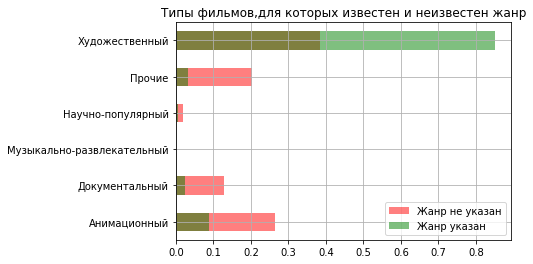

In [56]:
genre_isna_notna_compare('type', 'Типы фильмов,для которых известен и неизвестен жанр');

Большинство фильмов, для которых указан жанр относятся к типу художественных. То же относится и к фильмам, для которых жанр не указан.  
Однако, стоит отметить, что среди фильмов, для которых жанр не указан, высока также доля фильмов, относящихся к типам "анимационный", "прочие", "документальный", а также "научно-популярной"  

Возможно, жанр не указан для кинократин, из-за того, что его сложно определить в связи со сложностью сюжета. 

Посмотрим, есть ли взаимосвязь с возрастным ограничением.

Построим нормализованную гистограмму, на которой отобразим долю фильмов разных возрастных ограничений внутри категории "жанр указан" и категории "жанр не указан".

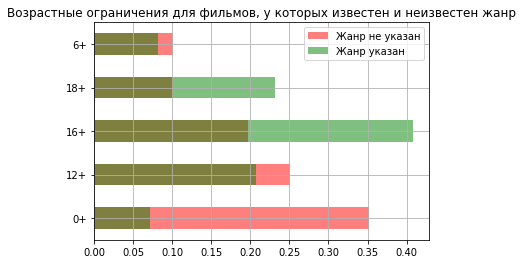

In [57]:
genre_isna_notna_compare('age_restriction', 'Возрастные ограничения для фильмов, у которых известен и неизвестен жанр');

Можно заметить, что среди фильмов, для которых жанр указан большую долю занимают фильмы "16+" и "18+", в то время как для фильмов, у которых жанр не определен, преобладает ограничение "0+" и "12+".   

Посмотрим, есть ли зависимость от года выпуская.

Аналогично, построим нормализованную гистограмму в которой отобразим количество фильмов, выходящих в тот или иной год, внутри категории "жанр указан" и категории "жанр не указан".

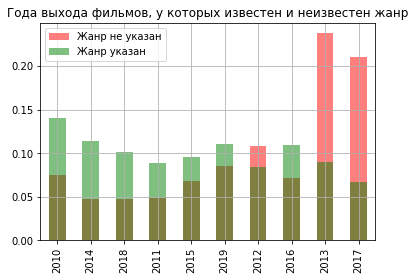

In [62]:
data[data['genres'].isna()]['show_start_date'].sort_values().dt.to_period('Y').value_counts(normalize=True, 
                                                                                            sort=False).plot.bar(alpha=0.5, 
                                                                                                                color='r', 
                                                                                                                label='Жанр не указан');

data[data['genres'].notna()]['show_start_date'].sort_values().dt.to_period('Y').value_counts(normalize=True, 
                                                                                             sort=False).plot.bar(alpha=0.5, 
                                                                                                                  color='g', 
                                                                                                                  label='Жанр указан');

plt.grid()
plt.title('Года выхода фильмов, у которых известен и неизвестен жанр');
plt.legend();

Среди фильмов, для которых известен жанр, года выхода распределены в целом равномерно, в то время как для фильмов, в которых жанр не известен преобладают 2013 и 2017 года выхода. Почему именно эти года - на данном этапе сказать сложно.  

**Краткое резюме**

Для некоторых фильмов, причина появления пропусков может быть в разнообразии сюжета кинокартины (которая может являться в том числе мультфильмом), в связи с чем определить жанр для нее было затруднительно. Для части же кинокартин допустимо, что пропуски допущены по иной причине, например, по какой-то причине жанр из заявлении на получение прокатногого удостоверения не попал в реестр.  

Пропуски в столбце `genres` целесообразно заполнить значением `Unknown`

In [63]:
# Заполним пропуски в столбце 'genres' значением 'Unknown'
data['genres'] = data.genres.fillna('Unknown')

# Проверим оставшееся колличество пропусков в столбце 'genres' после заполнения.
data['genres'].isna().sum()

0

#### Столбец `producer`

In [64]:
print(f'Столбец {nan_columns_count.iloc[3, 0]} содержит {nan_columns_count.iloc[3, 1]} пропусков, что составляет {round(nan_columns_count.iloc[3, 2]*100, 1)}% от общего объема данных')

Столбец producer содержит 568 пропусков, что составляет 7.6% от общего объема данных


Посмотрим на строки, в которых пропущены значения в столбце `producer`

In [65]:
data[data.producer.isna()].head(3)

,puNumber,box_office,title,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
46,111000915,197464.5,Горе от ума.,2015-02-05,Художественный,Киностудия им. М.Горького,СССР,"С.Алексеев, В.Войтецкий",NaN,6+,0,0,0,None,6.0,драма
113,111002216,240.0,Мама _,2016-02-12,Художественный,"Киностудия ""Мосфильм"", Киностудия ""Букурешти"",...","СССР, Румыния, Франция",Э.Бостан,NaN,0+,0,0,0,None,7.1,"ужасы,драма,триллер"
140,111002915,249166767.7,А зори здесь тихие..._,2015-03-16,Художественный,"ООО ""Компания ""Реал-Дакота""",Россия,Р.Давлетьяров,NaN,12+,50000000,100000000,220588394,ФК,8.5,"драма,военный,история"


Привлекает внимание страна выпуска первых двух фильмов - СССР. Получается, прокатные удостоверение можно получить и на старый фильм, и точно также крутить его в кинотеатрах.  
Посмотрим, есть ли связь со страной выпуска.

Применим для этого метод `value_counts()` c параметром нормализации.

In [66]:
data[data.producer.isna()].production_country.value_counts(normalize=True).head(10)

СССР              0.603175
Россия            0.065256
Великобритания    0.058201
США               0.042328
СССР              0.035273
Италия            0.028219
Япония            0.017637
Франция           0.014109
СССР              0.005291
СССР, ГДР         0.005291
Name: production_country, dtype: float64

Интересно. Более 60% фильмов, в которых пропущены значения в столбце `producer` были сделаны в СССР. Пр этом, ряд других значений также может включать в себя СССР, например строка "ГДР, СССР"  

Для того, чтобы посчитать, сколько у нас всего в этом срезе данных строк, которые включают в себя слово "СССР" создадим булевый фильтр. Затем этот фильтр применим к столбцу `production_country`. 

In [67]:
# Создадим булевый фильтр, который будет проверять вхождение слова 'СССР' в значениях столбца 'production_country' каждой строки
# среза данных 'production_country[data.producer.isna()]

USSR_mask_drop_na = ["СССР" in data[data.producer.isna()].production_country.dropna().loc[i] for i in data.production_country[data.producer.isna()].dropna().index]

In [68]:
print('Количество кинокартин, которые включают в себя страну производства "СССР", среди фильмов, в которых не указан продюссер:', 
      data[data.producer.isna()].production_country.dropna()[USSR_mask_drop_na].count() )


Количество кинокартин, которые включают в себя страну производства "СССР", среди фильмов, в которых не указан продюссер: 394


In [69]:
print('Количество кинокартин, в которых не указан продюссер, всего (исключая пропуски):',
data.production_country[data.producer.isna()].dropna().count())

Количество кинокартин, в которых не указан продюссер, всего (исключая пропуски): 567


In [70]:
print('Доля кинокартин, для которых в столбце "страна производства" присутствует СССР и отсутсвует продюсер от общей доли фильмов, для которых не указан продюссер:', 
     round(data[data.producer.isna()].production_country.dropna()[USSR_mask_drop_na].count() / data.production_country[data.producer.isna()].dropna().count(), 2))

Доля кинокартин, для которых в столбце "страна производства" присутствует СССР и отсутсвует продюсер от общей доли фильмов, для которых не указан продюссер: 0.69


Получается, среди фильмов, в которых не указан продюссер, практически 70% фильмов были произведены в СССР.

Интересно, а какая страна встречается чаще всего среди фильмов, с указанным продюссером.

In [71]:
data[~data.producer.isna()].production_country.value_counts(normalize=True).head(10)

США                     0.310539
Россия                  0.257915
Франция                 0.042359
Великобритания          0.032384
Италия                  0.016337
Германия                0.015614
США - Великобритания    0.012722
Испания                 0.010554
Япония                  0.009686
Франция - Бельгия       0.007951
Name: production_country, dtype: float64

Это страна - США.

Посмотрим, есть ли какая-то зависимость от типа фильма

In [72]:
data[data.producer.isna()].type.value_counts(normalize=True).head(10)

Художественный                0.836268
Прочие                        0.100352
Анимационный                  0.033451
Документальный                0.026408
Научно-популярный             0.003521
Музыкально-развлекательный    0.000000
Name: type, dtype: float64

In [73]:
data[data.producer.notna()].type.value_counts(normalize=True).head(10)

Художественный                0.785487
Анимационный                  0.117086
Прочие                        0.050448
Документальный                0.039462
Научно-популярный             0.007372
Музыкально-развлекательный    0.000145
Name: type, dtype: float64

От типа как таковой зависимости нет. Доля художественных фильмов практически одинакова как для фильмов с указанным продюссером, так и для фильмов без него.

**Краткое резюме**

Исходя из проведенного анализа, можно предположить, что пропуски в столбце `producer` в большей степени объясняются тем, что для фильмов, для которых не указан продюссер его действительно не было, потому что не было самого понятия "продюссер". Не было его либо в следствии культурных особенностей страны (`producer` - слово, которое зародилось в Голливуде в 1910-х годах*), в которой выпускался фильм, либо в следствии особенностей той эпохи, в которой фильм был снят изначально.  
Доказательством тому служит тот факт, что 70% таких фильмов были полностью либо частично выпущены в СССР. Такие фильмы в определенной степени можно назвать "фильмами прошлой эпохи".  

*[Источник](https://ru.wikipedia.org/wiki/%D0%9A%D0%B8%D0%BD%D0%BE%D0%BF%D1%80%D0%BE%D0%B4%D1%8E%D1%81%D0%B5%D1%80#%D0%98%D1%81%D1%82%D0%BE%D1%80%D0%B8%D1%8F)

Данные пропуски заполним значением 'None'

In [74]:
# Заполним пропуски в столбце 'producer' значением 'None'
data['producer'] = data.producer.fillna('None')

# Проверим оставшееся колличество пропусков в столбце 'producer' после заполнения.
data['producer'].isna().sum()

0

#### Столбец `film_studio`

In [75]:
print(f'Столбец {nan_columns_count.iloc[4, 0]} содержит {nan_columns_count.iloc[4, 1]} пропусков, что составляет {round(nan_columns_count.iloc[4, 2]*100, 1)}% от общего объема данных')

Столбец film_studio содержит 18 пропусков, что составляет 0.2% от общего объема данных


Посмотрим на строки, которые содержат пропуски в данном стобце

In [76]:
data[data.film_studio.isna()].head(18)

,puNumber,box_office,title,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
739,111021918,41225.0,Доживем до каникул?..,2018-11-15,Художественный,NaN,Россия,Я.Хальпукова (псевдоним Яна Мартынец),Я.Хальпукова (псевдоним Яна Мартынец),12+,0,0,0,None,NaN,Unknown
4179,121011114,NaN,Stars in Shorts,2014-06-03,Художественный,NaN,"США, Великобритания","Роберт Фестингер, Руперт Френд, Джей Камен, Ни...","Татьяна Келли, Роберта Мунро, Руперт Френд, До...",16+,0,0,0,None,7.3,комедия
5754,214000410,NaN,Мульт личности. Выпуск 5,2010-01-25,Художественный,NaN,NaN,NaN,None,0+,0,0,0,None,4.0,"мультфильм,комедия"
6824,111013818,NaN,Значит любит,2018-08-10,Художественный,NaN,Россия,А.Краевский,Е.Щербакова,18+,0,0,0,None,NaN,Unknown
6863,112007018,NaN,Несейка. Младшая дочь,2018-09-01,Документальный,NaN,Россия,В.Марин,"Д.Якунин, Ф.Абрютин, О.Филонова",6+,0,0,0,None,NaN,Unknown
6965,112011818,NaN,Ян Антонышев,2018-11-15,Документальный,NaN,Россия,Е.Окопная,Е.Герасимов,12+,0,0,0,None,NaN,Unknown
6966,112011918,NaN,Ян Антонышев,2018-11-15,Документальный,NaN,Россия,Е.Окопная,Е.Герасимов,12+,0,0,0,None,NaN,Unknown
7028,112014418,NaN,До и После,2018-12-05,Документальный,NaN,Россия,А.Новокреповская,А.Новокреповская,6+,0,0,0,None,6.9,"драма,криминал,детектив"
7035,113002018,NaN,Калмыцкий геше Нгаванг Вангьял,2018-12-05,Научно-популярный,NaN,Россия,И.Долгина,И.Долгина,12+,0,0,0,None,NaN,Unknown
7038,112014918,NaN,Мой папа Чингисхан,2018-12-06,Документальный,NaN,Россия,А.Сайфуллина,А.Сайфуллина,12+,0,0,0,None,NaN,Unknown


Посмотрим, связано ли отсутствие информации о студии-производителе со страной производства.

In [77]:
data[data.film_studio.isna()].production_country.value_counts(normalize=True).head(10)

Россия                 0.941176
США, Великобритания    0.058824
Name: production_country, dtype: float64

94% фильмов, для которых не указана студия были произведены в России.

 А где было снято большинство фильмов, с указанной студией?

In [78]:
data[data.film_studio.notna()].production_country.value_counts(normalize=True).head(10)

США                     0.290880
Россия                  0.241730
СССР                    0.046471
Франция                 0.040311
Великобритания          0.034418
Италия                  0.017276
Германия                0.014731
США - Великобритания    0.011785
Япония                  0.010312
Испания                 0.009910
Name: production_country, dtype: float64

При этом, большая доля кинокартин, для которых студия указана, были сняты в США.

Посмотрим, есть ли взаимосвязь с типом фильма.

In [79]:
data[data.film_studio.isna()].type.value_counts(normalize=True).head(10)

Документальный                0.444444
Художественный                0.388889
Научно-популярный             0.166667
Прочие                        0.000000
Музыкально-развлекательный    0.000000
Анимационный                  0.000000
Name: type, dtype: float64

Для фильмов, у которых не указана студия преобладают типы "Документальный" и "Художественный"

Посмотрим, как обстоят дела с типами фильмов, в которых студия указана.

In [80]:
data[data.film_studio.notna()].type.value_counts(normalize=True).head(10)

Художественный                0.790305
Анимационный                  0.111007
Прочие                        0.054365
Документальный                0.037493
Научно-популярный             0.006695
Музыкально-развлекательный    0.000134
Name: type, dtype: float64

Для таких фильмов преобладает художественный тип, и меньшей степени все остальные.

**Краткое резюме**

Тот факт, что большинство фильмов, у которых не указана студия, произведены в России и относятся к типам "Документальный", "Художественный" (и, хоть и в меньшей мере - "Научно-Популярный"), наталкивает на мысль, что данные фильмы могли быть произведены в рамках независимого кинематографа, который подразумевает производство фильмов в значительной или полной мере вне системы киностудий.  

Однако, всегда остается шанс, что для какого-то из фильмов студия не была указана просто потому, что по какой-то причине данные из заявления на прокатное удостоверение не перенесли в реестр.  
Пропуски в данных строках можно заполнить значением "None"

In [81]:
# Заполним пропуски в столбце 'film_studio' значением 'None'
data['film_studio'] = data['film_studio'].fillna('None') 

# Проверим оставшееся колличество пропусков в столбце 'film_studio' после заполнения.
data['film_studio'].isna().sum() 

0

#### Столбец `director`

In [82]:
print(f'Столбец {nan_columns_count.iloc[5, 0]} содержит {nan_columns_count.iloc[5, 1]} пропусков, что составляет {round(nan_columns_count.iloc[5, 2]*100, 1)}% от общего объема данных')

Столбец director содержит 9 пропусков, что составляет 0.1% от общего объема данных


Посмотрим на строки, которые содержат пропуски в данном стобце

In [83]:
data[data.director.isna()].head(9)

,puNumber,box_office,title,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
3040,126003512,44350.0,"Три звезды. Концерт в Waldbuhne Theater, Берли...",2012-12-04,Прочие,Райзинг Алтернатив,Великобритания,NaN,Вальдбюне Театр,0+,0,0,0,None,NaN,Unknown
4490,126003413,NaN,Помпеи. Британский музей,2013-09-11,Прочие,"МортуСкрин, Британский музей",Великобритания,NaN,Британский музей,0+,0,0,0,None,NaN,Unknown
5225,217027010,NaN,Зур концерт (Большой концерт).,2010-06-24,Художественный,"ООО ""Барс Рекордс""",Россия,NaN,None,12+,0,0,0,None,NaN,Unknown
5414,217017310,NaN,"Ганс Сэйфуллин ""Авылым чишмэлэре. Ганс Сэйфулл...",2010-04-22,Художественный,"ООО ""Барс-Рекордс""",Россия,NaN,None,0+,0,0,0,None,NaN,Unknown
5632,217020610,NaN,Изге Вэли (Святой Валентин),2010-05-20,Художественный,"ООО ""Барс Рекордс""",Россия,NaN,None,12+,0,0,0,None,NaN,Unknown
5732,126001710,NaN,Bon Jovi. The Circle Tour,2010-11-11,Прочие,Эншутц Интертейнмент Груп,США,NaN,Эншутц Интертейнмент Груп,0+,0,0,0,None,7.9,"концерт,музыка"
5754,214000410,NaN,Мульт личности. Выпуск 5,2010-01-25,Художественный,None,NaN,NaN,None,0+,0,0,0,None,4.0,"мультфильм,комедия"
6189,126001111,NaN,Георг Фридрих Гендель. Мессия. Оратория. Корол...,2011-04-25,Прочие,Опус Арт,Великобритания,NaN,Короевский колледж Кембриджа,0+,0,0,0,None,NaN,Unknown
6206,126002711,NaN,Питер Гэбриэл и New Blood Orchestra 3D,2011-11-11,Прочие,Омниверс Визион,Великобритания,NaN,Омниверс Визион,0+,0,0,0,None,6.7,"концерт,музыка"


Посмотрим подобнее на названия кинокартин.

In [84]:
data[data.director.isna()].title.unique()

array(['Три звезды. Концерт в Waldbuhne Theater, Берлин. Анна Нетребко. Йонес Кауфман. Эрвин Шрот.',
       'Помпеи. Британский музей', 'Зур концерт (Большой концерт).',
       'Ганс Сэйфуллин "Авылым чишмэлэре. Ганс Сэйфуллиннын 50 еллык ижат юбилеена багышланган концерт". (Родники деревни. Юбилейный концерт, посвященный 50-летию творчества Ганса Сайфуллина.)',
       'Изге Вэли (Святой Валентин)', 'Bon Jovi. The Circle Tour',
       'Мульт личности. Выпуск 5',
       'Георг Фридрих Гендель. Мессия. Оратория. Королевский колледж Кембриджа',
       'Питер Гэбриэл и New Blood Orchestra 3D'], dtype=object)

Если посмотреть на названия кинокартин, в которых отсутствует режиссер, то можно заметить, что они все представляют из себя концерты, плюс один фильм про музей и одна мультимедийная комедийная передача.  
Для такого формата картин действително допустимо отсутсвие режиссера. 

Будет справедливо, заменить пропуски в данном столбце на `None`

In [85]:
# Заполним пропуски в столбце 'director' значением 'None'
data['director'] = data.director.fillna('None')

# Проверим оставшееся колличество пропусков в столбце 'director' после заполнения.
data['director'].isna().sum()

0

#### Столбец `production_country`

In [86]:
print(f'Столбец {nan_columns_count.iloc[6, 0]} содержит {nan_columns_count.iloc[6, 1]} пропуска, что составляет {round(nan_columns_count.iloc[6, 2]*100, 1)}% от общего объема данных')

Столбец production_country содержит 2 пропуска, что составляет 0.0% от общего объема данных


Посмотрим на строки, которые содержат пропуски в данном стобце

In [87]:
data[data.production_country.isna()]

,puNumber,box_office,title,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
64,111001216,194527.0,"Детский юмористический киножурнал ""Ералаш. Ну ...",2016-02-09,Художественный,"ООО ""Продюсерский центр ЕРАЛАШ""",NaN,"Р.Светлов, И.Магитон, А.Арутюнян, Л.Мирский, А...","ООО ""Продюсерский центр ЕРАЛАШ""",0+,0,0,0,None,7.2,"детский,комедия"
5754,214000410,NaN,Мульт личности. Выпуск 5,2010-01-25,Художественный,None,NaN,None,None,0+,0,0,0,None,4.0,"мультфильм,комедия"


Посмотрим поближе на названия.

In [88]:
data[data.production_country.isna()].title.unique()

array(['Детский юмористический киножурнал "Ералаш. Ну просто фантазтика!"',
       'Мульт личности. Выпуск 5'], dtype=object)

Причина пропуска плохо понятна. Видимо в источнике, с которого были взяты данные Министерством курльтуры по какой-то причине для этих картин отсутствовало значение в графе "Страна производства".

Пропущенные значения в данных строках в столбце `production_country` можно смело заполнить значением "Россия"`

In [89]:
# Заполним пропуски в столбце 'production_country' значением 'Россия'
data['production_country'] = data.production_country.fillna('Россия')

# Проверим оставшееся колличество пропусков в столбце 'production_country' после заполнения.
data['production_country'].isna().sum()

0

#### Итог

Выведем на экран названия стобцов, для которых у нас остались пропуски.

In [90]:
data.columns[data.isna().sum() > 1]

Index(['box_office', 'ratings'], dtype='object')

На данном этапе мы изучили причины пропусков в столбцах датафрейма и частично их заполили.  
Мы заполнили:  

- Пропуски в `genres` - - значением 'Unknone'
- Пропуски в `producer` - значением 'None'
- Пропуски в `film_studio` - значением 'None'
- Пропуски в `director` - значением 'None'
- Пропуски в `production_country` - значением "Россия"  

Мы оставили пропуски в столбцах:  
- `box_office`
- `ratings`

### Шаг 2.3. Изучим дубликаты в датафрейме
- Проверьте, есть ли в данных дубликаты. Опишите причины, которые могли повлиять на появление дублей.

Посмотрим, есть ли полностью дублирирующиеся строки в данных.

In [91]:
data.duplicated().sum()

0

Полностью дублирующиеся строки в данных отсутствуют.

In [92]:
data.head(1)

,puNumber,box_office,title,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
0,111000113,2450.0,Тайна перевала Дятлова,2013-01-17,Художественный,"ООО ""Нон-Стоп Продакшн""",Россия,Ренни Харлин,"А.Роднянский, С.Мелькумов, С.Беспалов, Киа Джэм",16+,0,0,0,None,5.1,"ужасы,фантастика"


Часть столбцов мы проверим на наличие явных дубликатов (например посмотрим, повторяются ли значения в столбце `puNumber`).  
Часть столбцов мы проверим на наличие неявных дубликатов. На предыдущих этапах мы уже столкнулись с тем, что некоторые столбцы, хранящие данные в формате `object`, содержат внутри себя неявные дубликаты, которые созданы за счет добавления лишних пробелов до или после основного значения. Следовательно, применив к ним простую предобработку методом `str.strip()` мы проверим, присутсвует ли похожая проблема в других столбцах.

Первым шагом, исследуем значения в следующих столбцах на наличие неявных дубликатов:  
- `title`
- `film_studio`
- `production_country`
- `director`
- `producer`
- `genres`

После того, как мы избавимся от неявных дубликатов, мы проверим на наличие явных дубликатов столбцы:  
- `puNumber`
- `title`

#### Исследуем столбцы на наличие неявных дубликатов

Чтобы исследовать столбцы на наличие неявных дубликатов (а именно - лишних пробелов до или после слова) сравним количество уникальных значений в исходном столбце и в столбце, к которому будет применена фукнция `str.strip()`

In [93]:
search_for_imp_dupl_list = ['title', 'film_studio', 'production_country', 'director', 'producer', 'genres']

In [94]:
need_space_delete_list = [] # Создадим список, в который добавим названия столбцов, нуждающихся в очищении от пробелов.

for col_name in search_for_imp_dupl_list:
    print(f'Уникальных значений в исходном столбце {col_name}: {data[col_name].nunique()}, после предобработки: {data[col_name].str.strip().nunique()}')
    print('-------------------------------')
    if data[col_name].nunique() > data[col_name].str.strip().nunique():
        need_space_delete_list.append(col_name)
print(need_space_delete_list)

Уникальных значений в исходном столбце title: 6772, после предобработки: 6772
-------------------------------
Уникальных значений в исходном столбце film_studio: 5491, после предобработки: 5463
-------------------------------
Уникальных значений в исходном столбце production_country: 950, после предобработки: 934
-------------------------------
Уникальных значений в исходном столбце director: 4812, после предобработки: 4802
-------------------------------
Уникальных значений в исходном столбце producer: 5350, после предобработки: 5335
-------------------------------
Уникальных значений в исходном столбце genres: 743, после предобработки: 743
-------------------------------
['film_studio', 'production_country', 'director', 'producer']


Очистим значения, хранящиеся в столбцах из списка `need_space_delete_list` от лишних пробелов.

In [95]:
for column in need_space_delete_list:
    data.loc[:, column] = data[column].str.strip()

Проверим результат очистки.

In [96]:
# Создадим спискок, в который добавим все столбцы, данные в которых все еще нуждаются в очистке от пробелов
need_space_delete_list_after_pp = [] 

# Проверим остались ли необработанные столбцы
for column in need_space_delete_list:
    if data[column].nunique() > data[column].str.strip().nunique():
        need_space_delete_list_after_pp.append(column)

# Вновь выведем список названий столбцов, нуждающихся в предобработке.
print(need_space_delete_list_after_pp) 

[]


Как и ожидалось, мы полчили пустой список, что говорит о том, что все необходимые столбцы мы очистили от лишних пробелов, избавившись тем самым от неявных дубликатов.

**Промежуточный итог**

На данном этапе мы избавились от неявных дубликатов в столбцах `film_studio`, `production_country`, `director`, `producer` путем удаления лишних пробелов.

#### Исследуем столбцы на наличие явных дубликатов

1. Исследуем столбец `puNumber`

In [97]:
data.duplicated(subset=['puNumber']).sum()

2

В столбце `puNumber` есть 2 дубликата.  
Посмотрим, для каких номеров прокатных удостоверений есть дубликаты.

In [98]:
data[data.duplicated(subset=['puNumber'])]

,puNumber,box_office,title,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
5935,221154310,NaN,Иоанна - женщина на папском престоле /По роман...,2010-12-17,Художественный,"Константин Фильм, А Эр Ди Дегето Фильм, Дюне Ф...",Германия - Великобритания - Италия - Испания,Зенке Вортманн,"Оливер Бербен, Дорис Д.Хайнце, Фарук Элтан",16+,0,0,0,None,7.6,"драма,мелодрама,история"
6305,221054410,NaN,Анализируй то!,2010-05-25,Художественный,"Уорнер Бразерс, Виллидж Роадшоу Пикчерз, Эн-Пи...",США,Гарольд Реймис,"Джейн Розенталь, Паул Уэйнстейн",12+,0,0,0,None,6.8,"комедия,криминал"


Для номеров **221154310** и **221054410** нашлись дублирующиеся значения.

Исследуем каждый из них по отдельности, чтобы понять причину.

Ниже представлены фильмы, номер прокатного удостоверения которых - **221154310**

In [99]:
data.query('puNumber == 221154310')

,puNumber,box_office,title,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
5934,221154310,NaN,Как жениться и остаться холостым,2010-12-17,Художественный,"Ше Вам, Скрипт Ассосье, Тэ Фэ 1 Фильм Продюксь...",Франция,Эрик Лартиго,"Амандин Било, Алан Шаба",16+,0,0,0,None,7.0,"мелодрама,комедия"
5935,221154310,NaN,Иоанна - женщина на папском престоле /По роман...,2010-12-17,Художественный,"Константин Фильм, А Эр Ди Дегето Фильм, Дюне Ф...",Германия - Великобритания - Италия - Испания,Зенке Вортманн,"Оливер Бербен, Дорис Д.Хайнце, Фарук Элтан",16+,0,0,0,None,7.6,"драма,мелодрама,история"


Ниже представлены фильмы, номер прокатного удостоверения которых - **221054410**

In [100]:
data.query('puNumber == 221054410')

,puNumber,box_office,title,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
6304,221054410,NaN,Анализируй это!,2010-05-25,Художественный,"Уорнер Бразерс, Вилладж Роудшоу Филмз ЛТД",США-Австралия,ХЭрольд Рэмис,"Джейн Розенталь, Пола Уейнстейн",16+,0,0,0,None,7.4,"комедия,криминал"
6305,221054410,NaN,Анализируй то!,2010-05-25,Художественный,"Уорнер Бразерс, Виллидж Роадшоу Пикчерз, Эн-Пи...",США,Гарольд Реймис,"Джейн Розенталь, Паул Уэйнстейн",12+,0,0,0,None,6.8,"комедия,криминал"


*P. S. К слову о неявных дубликатах. Можно заметить, что они пристуствуют и в иной форме - в форме разного написания. К примеру в столбце `director` "ХЭрольд Рэмис" и "Гарольд Реймис" - один и тот же человек, но фамилия написана разными способами. Можно предположить, что такая проблема может встретиться и в столбцах `film_studio`, `producer`*

В первом случае, это совершенно разные фильмы. Во втором - это первая и вторая части фильма, однако также две разные кинокартины.  
В данных ошибки нет, так как при проверке в [реестре](https://opendata.mkrf.ru/opendata/7705851331-register_movies) запрос показал точно такие же результаты.  

Причина, по которой один и тот же номер прокатного удостоверения может быть выдан совершенно разным фильмам, с разными студиями производства - не ясна.  

2. Исследуем столбец `title`

In [101]:
data.duplicated(subset=['title']).sum()

714

В столбце `title` содержится 714 дубликатов.  
Посмотрим, для названий каких фильмов в данных есть дубликаты.

Посмотрим на количество уникальных значений в срезе с дублирующимися названиями фильмов.

In [102]:
data[data.duplicated(subset=['title'])].title.nunique()

558

Итак, для 558 фильмов в наших данных нашлось хотя бы по одному дубликату. Возьмем некоторые из них случайным образом и изучим.

Посмотрим на 10 уникальных значений столбца title из среза с дубликатами.

In [103]:
data[data.duplicated(subset=['title'])].title.unique()[:10]

array(['Большая афера', 'Лимб',
       'Гарри Поттер и Дары Смерти - Часть 1/По роману Дж.К.Ролинг/',
       'Гарри Поттер и Дары Смерти - Часть 2 /По роману Дж.К.Ролинг/',
       'Зверь', 'Хаббл 3D', 'За тридевять земель.', 'Монстры на острове',
       'Волшебная страна.', 'Песнь моря'], dtype=object)

In [104]:
data.query('title == "Большая афера"')

,puNumber,box_office,title,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
1539,121012316,300.0,Большая афера,2016-05-23,Художественный,"Макс Филмз Продакшнз, Морган Льюис Компани",Канада,Дон МакКеллар,"Барбора Доран, Жан-Мари Комю, Роджер Фраппье",16+,0,0,0,None,7.4,"комедия,драма"
1713,121016014,1260.0,Большая афера,2014-07-29,Художественный,"Макс Филмз Продакшнз, Морган Льюис Компани",Канада,Дон МакКеллар,"Барбора Доран, Жан-Мари Комю, Роджер Фраппье",16+,0,0,0,None,7.4,"комедия,драма"


Разные номера прокатных удостоверений. Разные сборы в кинотеатрах. Разные даты релиза.

In [105]:
data.query('title == "Гарри Поттер и Дары Смерти - Часть 1/По роману Дж.К.Ролинг/"')

,puNumber,box_office,title,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
1964,121021010,1700.0,Гарри Поттер и Дары Смерти - Часть 1/По роману...,2010-11-11,Художественный,"Уорнер Бразерс, Хэйдэй Филмз",США - Великобритания,Дэвид Йейтс,"Дейвид Баррон, Дейвид Хейман",16+,0,0,0,None,8.1,"фэнтези,драма,детектив"
2276,121026516,745510.0,Гарри Поттер и Дары Смерти - Часть 1/По роману...,2016-09-23,Художественный,"Уорнер Бразерс, Хэйдэй Филмз",США - Великобритания,Дэвид Йейтс,"Дейвид Баррон, Дейвид Хейман",16+,0,0,0,None,8.1,"фэнтези,драма,детектив"
5832,221144910,NaN,Гарри Поттер и Дары Смерти - Часть 1/По роману...,2010-12-10,Художественный,"Уорнер Бразерс, Хэйдэй Филмз",США - Великобритания,Дэвид Йейтс,"Дейвид Баррон, Дейвид Хейман",16+,0,0,0,None,8.1,"фэнтези,драма,детектив"
6294,221068911,NaN,Гарри Поттер и Дары Смерти - Часть 1/По роману...,2011-05-18,Художественный,"Уорнер Бразерс, Хэйдэй Филмз",США - Великобритания,Дэвид Йейтс,"Дейвид Баррон, Дейвид Хейман",16+,0,0,0,None,8.1,"фэнтези,драма,детектив"


И снова можно заметить: Разные номера прокатных удостоверений. Разные сборы в кинотеатрах. Разные даты релиза.

Видимо причина, по которой дублируются фильмы состоит в том, что компания, владеющая правами на фильм, осуществляла релиз одного и того же фильма в разные периоды времени.  В результате, фильмы получают иной номер прокатного удостоверения, иную дату релиза. И как следствие, различные сборы.  

Фильмы, для которых сборы в кинотеатрах не указаны, могли выпускаться на иных носителях. Для таких фильмов также могу присутсвовать дубли, так как для одного и того же фильма могу быть разные прокатные удостоверения для разных носителей.

В данном случае, имеет смысл оставить дубликаты в таблице. Когда мы будем анализировать фильм, важно помнить, что на самом деле мы анализируем определенную версию фильма, выпущенную на определенном носителе в определенный период времени. Один и тот же фильм может пользовать различным успехом в разные года (например, когда дело будет касаться анализа бюджетных сборов).

**Промежуточный итог**

На данном этапе мы изучили причины появления явных дубликатов в столбцах `puNumber` и `title`

#### Итог

При исследовании дубликатов, мы столкнулись с несколькими проблемами: 
- Неявные дубликаты встречались в виде строк, с лишними пробелами до / после слова. От таким дубликатов мы почистили данные методом `str.strip()`
- Неявные дубликаты также встречались в виде разного написания одного и того же слова (к примеру, в отношении иностранных фамилий: "ХЭрольд Рэмис" и "Гарольд Реймис"). Такие дубликаты на данном мы оставили без изменений, так как в рамках данного исследования ими можно пренебречь.  

Что касается явных дубликатов, они обнаружились в столбцах `puNumber` и `title`.  
- Для того, чтобы  установить причину появления дубликатов в столбце `puNumber` нам оказалось недостаточно имеющихся данных. Был отправлен запрос в официальный источник (opendata@mincultrf.ru), однако ответ все еще не был получен. 
- Причина появления дубликатов в столбце `title` может быть связана с тем, что один и тот же фильм получал разные прокатные удостоверений для   
  - Релиза фильма в разное время
  - Для релиза фильма на разных носителях

### Шаг 2.4. Изучим категориальные значения

- *Посмотрите, какая общая проблема встречается почти во всех категориальных столбцах;*
- *Исправьте проблемные значения в поле `type`.*



На основании вышепроведенного анализа и предпринятых шагов по предобработке данных были выявлены следующие проблемы:  
- Во многих категориальных столбцах (`type`, `film_studio`, `production_country`, `director`, `producer`) встречались лишние пробелы вначале и в конце строки, что приводило к появлению неявных дубликатов в данных столбцах.  
- В столбце `director` присутвуют одинаковые значения с разным написанием (пример: "ХЭрольд Рэмис" и "Гарольд Реймис" - один и тот же человек, но фамилия написана разными способами). Можно предположить, что такая проблема может встретиться и в столбцах `film_studio`, `producer`.

### Шаг 2.5. Проверим количественные значения

- Проверьте, обнаружились ли в таких столбцах подозрительные данные. Как с такими данными лучше поступить?



Выведем на экран столбцы, в которых содержатся количественные значения.

In [106]:
data.select_dtypes(['int', 'float']).head()

,puNumber,box_office,refundable_support,nonrefundable_support,budget,ratings
0,111000113,2.450000e+03,0,0,0,5.1
1,111000115,6.104000e+04,0,34000000,49280496,6.7
2,111000116,1.530300e+08,20000000,20000000,78686500,5.8
3,111000117,1.226096e+07,7000000,20000000,45483233,6.7
4,111000118,1.636841e+08,0,0,0,3.2


Изучим значения столбцов:  
- `box_office`
- `refundable_support`
- `nonrefundable_support`
- `budget`
- `ratings`

#### Столбец `box_office`

In [107]:
data.box_office.describe().apply("{:,.0f}".format)

count            3,158
mean        76,478,696
std        240,353,123
min                  0
25%             86,239
50%          2,327,988
75%         23,979,671
max      3,073,568,691
Name: box_office, dtype: object

Всего сборы указаны для 3158 фильмов (или, возможно правильнее даже сказать - для 3158 прокатных удостоверений на фильмы)  
Средний сбор - 76,5млн.р. При этом 50% значений лежат ниже цифры в 2,372,988. Стандартное отклонение от среднего составляет 240,3 млн.р. Это очень большой разброс значений.   
Такое отклонение и такое разброс может быть вызван очень большим диапазоном: минимальный сбор составляет 0, в то время как максимальный - 3 млрд.р.

Посмотрим как выглядит диаграмма разброса.

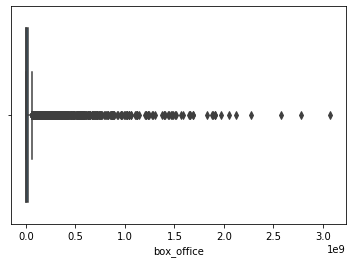

In [108]:
sns.boxplot(data.box_office);

Хорошо видно большое количество выбросов в стороне больших значений.  

Посмотрим на аномально выcокие значения (например фильмы, которые собрали более 2-х млрд.р.)

In [109]:
data.query('box_office > 2*10**9').head(3)

,puNumber,box_office,title,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
533,111011817,2.779686e+09,Движение вверх,2017-12-21,Художественный,"ООО ""Студия ""ТРИТЭ"" Никиты Михалкова""",Россия,А.Мегердичев,"Л.Верещагин, А.Златопольский, Н.Михалков, ООО ...",6+,0,400000000,590192191,ФК,7.5,"спорт,драма"
736,111021719,3.073569e+09,Холоп,2019-12-19,Художественный,"ООО ""МЕМ-МЕДИА"" по заказу АО ""ВБД Груп""",Россия,К.Шипенко,"Э.Илоян, Д.Жалинский, В.Дусмухаметов, Т.Бадзие...",12+,25000000,35000000,160000000,ФК,6.8,комедия
759,111024918,2.271754e+09,Т-34,2018-12-21,Художественный,"ООО ""Кинокомпания МАРС-фильм"" по заказу ООО ""М...",Россия,А.Сидоров,"А.Златопольский, Р.Дишдишян, Л.Блаватник, Н.Яр...",12+,60000000,120000000,563784717,ФК,6.5,"драма,военный,боевик"


В больших значениях в данном случае нет ничего подозрительного. Судя по всему это действительно фильмы, которые имели достаточно высокие кассовые сборы.

Теперь посмотрим, что представляют из себя строки с аномально низкими значениями.  

In [110]:
data.query('box_office < 10000').tail()

,puNumber,box_office,title,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
3153,224014814,1530.0,Лесной патруль,2014-11-17,Анимационный,Неофилм,Норвегия,Расмус А.Сивертсен,"Ааге Ааберге, Ливе Бонневье",0+,0,0,0,None,5.6,"мультфильм,приключения,семейный"
3154,224021411,9270.0,Кунг-фу Панда 2.,2011-11-15,Анимационный,ДримУоркс Анимэйшн,США,Дженнифер Ю,"Мелисса Кобб, Джонатан Айбел, Гленн Бергер",0+,0,0,0,None,7.4,"мультфильм,фэнтези,боевик"
3155,224022410,400.0,Союз зверей /По книге Эрика Кастнера/,2010-11-18,Анимационный,"Эмбиент ИНтертейнмент, Константин Филм, Уайт Х...",Германия,"Рейнхард Клоос, Хольгер Таппе","Рейнхард Клоос, Мартин Московиц, Хольгер Таппе...",0+,0,0,0,None,5.6,"мультфильм,комедия,приключения"
3156,224023210,360.0,Гадкий Я,2010-11-23,Анимационный,"Иллюминейшн Интертейнмент, Юниверсал Пикчерз",США,"Пьер Коффин, Крис Рено","Джон Коэн, Кристофер Милидандри",0+,0,0,0,None,7.7,"мультфильм,фэнтези,комедия"
3157,224026410,400.0,Легенды ночных стражей /По мотивам произведени...,2010-12-10,Анимационный,"Уорнер Бразерс, Виллидж Роадшоу Пикчерз",США - Австралия,Зак Снайдер,Зарех Налбандьян,0+,0,0,0,None,7.5,"мультфильм,фэнтези,боевик"


Кунг Фу Панда, Гадкий Я, Лесной патруль. Вот подозрительные значения. Эти фильмы не могли собрать так мало. Побробуем обратиться к гугл и выяснить в чем причина.  
- "Гадкий Я" по данным кинопоиска собрал около 360 млн рублей (\$11 млн. по курсу 2010 года)  
- "Кунг-фу Панда 2" по данным кинопоиска собрал около 900 млн рублей (\$36 млн. по курсу 2011 года)
- "Лесной патруль" по данным кинопоиска собрал около 1,5 млн рублей (\$30 тыс по курсу на ноябрь 2014 года)  

Получается, что значения указаны в миллионах, либо сотнях тысяч, либо вовсе в тысячах рублей.  
Отсюда отчасти может быть искажение диаграммы разброса. Возможно, если бы значения были верные, то часть более высоких суммы не определялись бы как выбросы.

Однако нельзя не допускать того факта, что действительно могли найтись фильмы, получившие низкие кассовые сборы.

Посмотрим так же на фильмы, которые получили нулевые сборы.

In [111]:
data.query('box_office == 0').head()

,puNumber,box_office,title,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
83,111001610,0.0,"Москва, я люблю тебя",2010-02-09,Художественный,"ООО ""БФГ-МЕДИА-ПРОДАКШН"", ООО ""Продюсерская ко...",Россия,"Г.Михалков, Г.Натансон, В.Сторожева, А.Касатки...","Ю.Глоцер, Ю.Гинзбург",16+,0,0,0,None,4.5,"мелодрама,комедия"
104,111002015,0.0,Поездка к матери,2015-03-02,Художественный,"ЗАО ""Киностудия ""М""-Фильм""",Россия,М.Косырев-Нестеров,М.Косырев-Нестеров,16+,0,0,0,None,NaN,"драма,семейный"
117,111002414,0.0,Весёлые ребята ;),2014-02-27,Художественный,"ЗАО ""ПРОДЮСЕРСКАЯ КОМПАНИЯ ВАЛЕРИЯ ТОДОРОВСКОГО""",Россия,А.Бобров,В.Тодоровский,6+,0,0,0,None,NaN,Unknown
144,111003012,0.0,Запах вереска,2012-05-23,Художественный,"ООО ""Студия РИМ""",Россия,А.Магомедов,"М.Балашова, Е.Миронов",16+,0,0,0,None,6.3,комедия
277,111005910,0.0,КРАСНЫЙ ЛЕД. Сага о хантах Югры,2010-06-04,Художественный,"Департамент культуры и искусства ХМАО-Югры, ОО...",Россия,О.Фесенко,О.Урушев,16+,0,0,0,None,4.5,"драма,история"


In [112]:
print('Всего фильмов, получивших нулевые сборы', data.query('box_office == 0').shape[0])

Всего фильмов, получивших нулевые сборы 24


Посмотрим на источники финансирования этих фильмов.

In [113]:
data.query('box_office == 0').financing_source.value_counts()

None      24
ФК         0
МК, ФК     0
МК         0
Name: financing_source, dtype: int64

Ни один из этих фильмов не был профинансирован государством. 

Однако однозначную причину все же назвать сложно. Может быть, на часть этих фильмов и правда никто не пришел, а может быть быть они по какой-то иной причине не были указаны.

Хотелось бы попробовать установить нижнюю границу, значения ниже которой можно было бы считать подозрительно низкими.  
Посмотрим на распределение данных по отрезкам.  
Возможно, нам найти какую-то аномалию в распределении данных, благодаря чему мы сможем создать нижний порог "адекватных" значений.

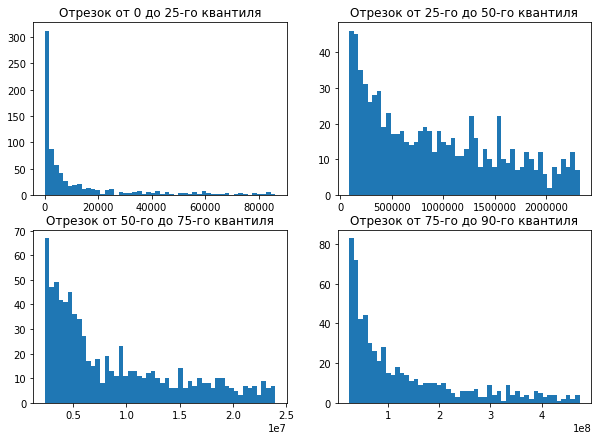

In [114]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
fig.set_figwidth(10)
fig.set_figheight(7)

ax1.hist(x=data.box_office, 
         bins=50, label='1',
         range=(0, data.box_office.quantile(.25)));
ax1.set_title('Отрезок от 0 до 25-го квантиля')

ax2.hist(x=data.box_office, 
         bins=50,
         range=(data.box_office.quantile(.25), data.box_office.quantile(.5)));
ax2.set_title('Отрезок от 25-го до 50-го квантиля')

ax3.hist(x=data.box_office, 
         bins=50,
         range=(data.box_office.quantile(.5), data.box_office.quantile(.75)));
ax3.set_title('Отрезок от 50-го до 75-го квантиля')

ax4.hist(x=data.box_office, 
         bins=50,
         range=(data.box_office.quantile(.75), data.box_office.quantile(.95)));
ax4.set_title('Отрезок от 75-го до 90-го квантиля');

Распределения по отрезкам похожи. Разве что на первом графике, на значении 10000 словно происходит некий излом, и затем график начинает вести себя более плавно. Посмотрим, как бы выгляждело распределение на отрезке 10000, до 25-го квантиля

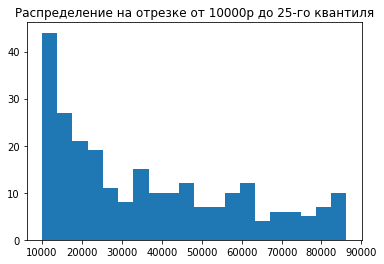

In [115]:
plt.hist(x=data.box_office, 
         bins=20,
         range=(10000, data.box_office.quantile(.25)));
plt.title('Распределение на отрезке от 10000р до 25-го квантиля');

В такой форме оно действительно больше похоже на остальные 3 распределения.

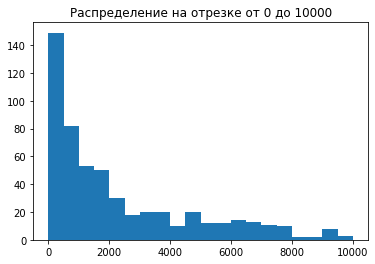

In [116]:
plt.hist(x=data.box_office, 
         bins=20,
         range=(0, 10000));
plt.title('Распределение на отрезке от 0 до 10000');

Оно также похоже на предыдущие распределения. Получается, даже если разбить распределение на отрекзки, они в целом будут похожи по форме друг на друга.

Посмотрим, какую долю составляют фильмы, набравшие менее 10000 р сборов.

In [117]:
data.query('box_office < 10000').box_office.notna().shape[0] / data.box_office.notna().shape[0]

0.07200106866150147

Они составляют 7% от общего количество данных, для которых сборы указаны.

**Промежуточный итог**

Нам удалось найти подозрительно низкие значения в данном столбце и мы смогли установить их причину - в большинстве случаев, это неверно указанные единицы измерения. Однако найти какую-то четкую границу, по которой их можно было бы отделить - не удалось.

#### Столбцы `refundable_support` и `nonrefundable_support`

В данном случае, разумно будет взять срез данных, в который включены фильмы, профинансированные государством.

In [118]:
data.query('financing_source != "None"').describe()[['refundable_support', 'nonrefundable_support']].astype(int)

,refundable_support,nonrefundable_support
count,332,332
mean,11864457,48980988
std,24916555,59980117
min,0,0
25%,0,25000000
50%,0,30000000
75%,15000000,40375000
max,180000000,400000000


Интересно посмотреть на срез данных, которые не включают в себя нулевые значения по обоим столбцам.

In [119]:
describe_refund = data.query('financing_source != "None" and refundable_support != 0').describe()['refundable_support'].astype(int)
describe_nonrefund = data.query('financing_source != "None" and nonrefundable_support != 0').describe()['nonrefundable_support'].astype(int)

describe_gov_help = describe_refund.to_frame().join(describe_nonrefund)
describe_gov_help

,refundable_support,nonrefundable_support
count,111,323
mean,35486486,50345784
std,31972875,60243206
min,3500000,3000000
25%,15000000,25000000
50%,25000000,30000000
75%,50000000,45000000
max,180000000,400000000


Можно заметить, что средний объем невозвратных средств (также как и максимальный) выше объема возвратных средств, выделенных государством на поддержку фильмов.  
И помимо того, что суммы были выше, государство выделяло на фильмы невозвратных средств в 3 раза чаще, чем возвратных.

Также, важно не забывать, что были фильмы на которые были выделены и те и другие средства.

In [120]:
round(
    data.query('financing_source != "None" and refundable_support != 0 and nonrefundable_support != 0').shape[0] / 
    data.query('financing_source != "None"').shape[0], 
    2)

0.31

31% фильмов получили поддержку одно временно в виде возвратных и невозвратных средств.

Ради любопытсва посмотрим на описания столбцов `refundable_support` и `nonrefundable_support` в срезе данных для фильмов, которые получили оба вида поддержки.

In [121]:
data.query('refundable_support != 0 and nonrefundable_support != 0').describe()[['refundable_support', 'nonrefundable_support']].astype(int)

,refundable_support,nonrefundable_support
count,102,102
mean,33921568,65127730
std,31599405,77659634
min,3500000,5000000
25%,15000000,25000000
50%,25000000,35000000
75%,40750000,60000000
max,180000000,400000000


Соотношение сохраняется: невозвратных средств такие фильмы получили больше чем невозвратных. На каждый 1000 рублей возвратных средств они получили 1400 невозвратных (в соотвествии с медианой).

Посмотрим также на распределение объема возвратных и невозвратных средств (с учетом нулевых значений).

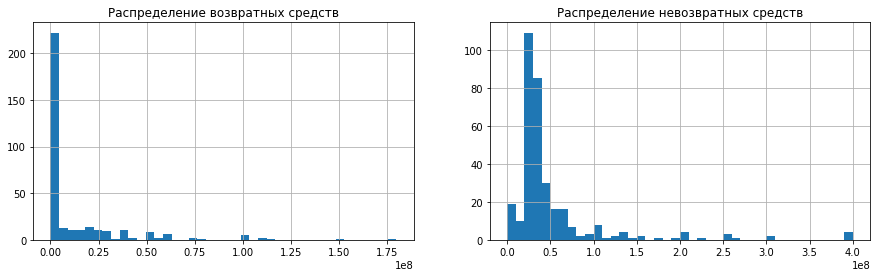

In [122]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_figheight(4)
fig.set_figwidth(15)

data.query('financing_source != "None"').refundable_support.hist(bins=40, ax=ax1);
ax1.set_title('Распределение возвратных средств')

data.query('financing_source != "None"').nonrefundable_support.hist(bins=40, ax=ax2);
ax2.set_title('Распределение невозвратных средств');

На гистограммах также хорошо видно, что невозвратных средств государство выделяло чаще и больше, чем возвратных.

**Промежуточный итог**

Аномалий в данных стобцах обнаружено не было.  
Однако был замечен интересный факт: невозвратных средств государство выделяло на поддержку больше и чаще, нежели возвратных.  

#### Столбец `budget`

Столбец `budget` включает в себя сумму значений столбцов `nonrefundable_support` и `refundable_support`, а также может включать некоторую часть средств, которую авторы фильма привлекли из собственных средств. 

Следовательно, столбец `budget` должен быть не меньше, чем сумма по столбцам `nonrefundable_support` и `refundable_support`  

Проверим это условие, методом от обратного. Посмотрим, есть ли строки, в которых `budget` меньше суммы `nonrefundable_support` и `refundable_support`

In [123]:
((data['nonrefundable_support'] + data['refundable_support']) > data['budget']).sum()

17

Похоже что в 17 случая бюджет фильма меньше, чем объем профинансированных в него средств. Это подозрительно. Посмотрим на строки, в которых это встречается.

In [124]:
sum_is_bigger_then_budget = (data['nonrefundable_support'] + data['refundable_support']) > data['budget']
data[sum_is_bigger_then_budget].head(17)

,puNumber,box_office,title,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
16,111000415,4.461635e+08,Дуxless 2,2015-01-26,Художественный,"ООО ""Киностудия ""Слово"", ООО ""Арт Пикчерс Студия""",Россия,Р.Прыгунов,"П.Ануров, Ф.Бондарчук, Д.Рудовский",16+,0,75000000,0,ФК,6.6,драма
196,111004317,5.045195e+07,Мифы,2017-06-07,Художественный,"ООО ""ХАЙПФИЛМ"", ООО ""Арт Пикчерс Студия""",Россия,А.Молочников,"Ф.Бондарчук, Д.Рудовский, И.Стюарт, М.Османн, ...",16+,25000000,20000000,0,ФК,4.8,комедия
234,111004916,1.536293e+07,Помню - не помню!,2016-03-01,Художественный,"ООО ""КиноФирма""",Россия,В.Ровенский,"ООО ""КиноФирма""",12+,0,6000000,0,МК,4.3,комедия
392,111008216,7.029905e+07,Любовь с ограничениями,2016-04-29,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Тюрин,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",16+,19000000,51000000,0,ФК,6.3,"комедия,мелодрама"
454,111009615,6.741897e+07,Бармен.,2015-05-26,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Штурманова,Т.Вайнштейн,16+,20000000,0,0,ФК,6.2,"комедия,фэнтези"
482,111010215,1.957739e+06,Тряпичный союз,2015-06-08,Художественный,"ООО ""Кинокомпания ""КОКТЕБЕЛЬ""",Россия,М.Местецкий,"Р.Борисевич, А.Кушаев",18+,0,59000000,0,ФК,6.3,"комедия,драма"
543,111012117,2.251964e+08,Селфи,2018-02-01,Художественный,"ООО ""Киностудия ""Слово"", ООО ""Арт Пикчерс Студия""",Россия,Н.Хомерики,"П.Ануров, Ф.Бондарчук, Д.Рудовский",16+,20000000,40000000,0,ФК,5.8,"триллер,драма"
653,111017115,7.293778e+07,Срочно выйду замуж,2015-09-30,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,С Чекалов,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",16+,0,35000000,0,ФК,5.1,"комедия,мелодрама"
658,111017315,1.965724e+08,Воин (2015),2015-09-28,Художественный,"ООО ""Форпост Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,А.Андрианов,"ООО ""Арт Пикчерс Студия""",12+,10000000,70000000,0,ФК,7.8,"боевик,драма,криминал"
676,111018116,1.038321e+09,Притяжение (2016),2016-12-16,Художественный,"ООО ""Водород 2011"", ООО ""Арт Пикчерс Студия""",Россия,Ф.Бондарчук,"ООО ""Арт Пикчерс Студия""",12+,0,250000000,0,ФК,5.6,фантастика


Теперь понятно. У нас указан объем возвратных и/или невозвратных средств, однако не посчитана общая сумма `budget`.  
Так как мы знаем, что столбец `budget` представляет из себя сумму возвратных и невозвратных средств (а также личные средства авторов фильма, но в данном случае у нас нет о них никакой информации), возпользуемся имеющимися данными и заполним столбце `budget` этой суммой.

In [125]:
data.loc[sum_is_bigger_then_budget, 'budget'] = (data.loc[sum_is_bigger_then_budget, 'refundable_support'] + 
                                                     data.loc[sum_is_bigger_then_budget, 'nonrefundable_support'])

Посмотрим вновь на срез данных, для которого мы заоплняли значения.

In [126]:
data[sum_is_bigger_then_budget]

,puNumber,box_office,title,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
16,111000415,4.461635e+08,Дуxless 2,2015-01-26,Художественный,"ООО ""Киностудия ""Слово"", ООО ""Арт Пикчерс Студия""",Россия,Р.Прыгунов,"П.Ануров, Ф.Бондарчук, Д.Рудовский",16+,0,75000000,75000000,ФК,6.6,драма
196,111004317,5.045195e+07,Мифы,2017-06-07,Художественный,"ООО ""ХАЙПФИЛМ"", ООО ""Арт Пикчерс Студия""",Россия,А.Молочников,"Ф.Бондарчук, Д.Рудовский, И.Стюарт, М.Османн, ...",16+,25000000,20000000,45000000,ФК,4.8,комедия
234,111004916,1.536293e+07,Помню - не помню!,2016-03-01,Художественный,"ООО ""КиноФирма""",Россия,В.Ровенский,"ООО ""КиноФирма""",12+,0,6000000,6000000,МК,4.3,комедия
392,111008216,7.029905e+07,Любовь с ограничениями,2016-04-29,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Тюрин,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",16+,19000000,51000000,70000000,ФК,6.3,"комедия,мелодрама"
454,111009615,6.741897e+07,Бармен.,2015-05-26,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Штурманова,Т.Вайнштейн,16+,20000000,0,20000000,ФК,6.2,"комедия,фэнтези"
482,111010215,1.957739e+06,Тряпичный союз,2015-06-08,Художественный,"ООО ""Кинокомпания ""КОКТЕБЕЛЬ""",Россия,М.Местецкий,"Р.Борисевич, А.Кушаев",18+,0,59000000,59000000,ФК,6.3,"комедия,драма"
543,111012117,2.251964e+08,Селфи,2018-02-01,Художественный,"ООО ""Киностудия ""Слово"", ООО ""Арт Пикчерс Студия""",Россия,Н.Хомерики,"П.Ануров, Ф.Бондарчук, Д.Рудовский",16+,20000000,40000000,60000000,ФК,5.8,"триллер,драма"
653,111017115,7.293778e+07,Срочно выйду замуж,2015-09-30,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,С Чекалов,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",16+,0,35000000,35000000,ФК,5.1,"комедия,мелодрама"
658,111017315,1.965724e+08,Воин (2015),2015-09-28,Художественный,"ООО ""Форпост Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,А.Андрианов,"ООО ""Арт Пикчерс Студия""",12+,10000000,70000000,80000000,ФК,7.8,"боевик,драма,криминал"
676,111018116,1.038321e+09,Притяжение (2016),2016-12-16,Художественный,"ООО ""Водород 2011"", ООО ""Арт Пикчерс Студия""",Россия,Ф.Бондарчук,"ООО ""Арт Пикчерс Студия""",12+,0,250000000,250000000,ФК,5.6,фантастика


In [127]:
#а также проверим, не осталось ли еще где-то таких значений
((data['nonrefundable_support'] + data['refundable_support']) > data['budget']).sum()

0

Все ок. Данные заполнились корректно.

Посмотрим на описание данных.

In [128]:
data.query('financing_source != "None"').budget.describe().apply("{:,.0f}".format)

count              332
mean       131,422,396
std        187,148,243
min          6,000,000
25%         45,524,800
50%         71,196,902
75%        150,000,000
max      2,305,074,303
Name: budget, dtype: object

Стандартное отклонение практически в 1,5 раза больше среднего.   
Разброс значений бюджетов фильмов составляет от 6 млн до 2,3 млрд. р.  
Среднее значение практически в два раза больше медианы, что говорит о том, что встречаются редкие, однако значительно большие чем основная масса данных значения.  
75% фильмов имеют бюджет менее 150 млн. р.

Посмотрим на распределение.

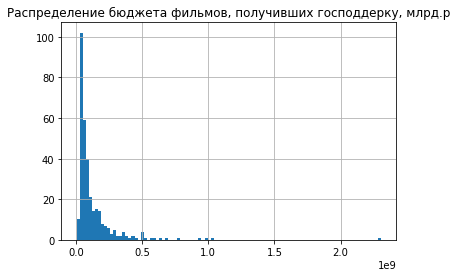

In [129]:
data.query('financing_source != "None"').budget.hist(bins=100);
plt.title('Распределение бюджета фильмов, получивших господдерку, млрд.р');

Действительно, на гистограмме виден длинный хвост справа, из за которого среднее арифметическое так сильно смещается относительно медианы.  

**Промежуточный итог**

Были обнаружены строки, в которых значения в столбце с бюджетом были меньше, чем сумма возвратного и невозвратного финансирования. Это были нулевые столбцы. Мы заполнили их соотвуетсвующей суммой, опираясь на имеющиеся данные.  
Иных аномалий обнаружено не было.

#### Столбец `ratings`

In [130]:
data.ratings.describe()

count    6490.000000
mean        6.479245
std         1.101665
min         1.000000
25%         5.900000
50%         6.600000
75%         7.200000
max         9.200000
Name: ratings, dtype: float64

Среднее значение рейтинга для фильмов приблизительно 6,5.

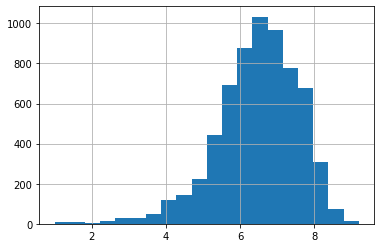

In [131]:
data.ratings.hist(bins=20);

На гистограмме никаких аномалий нет. Видно, что большинство значений лежит в диапазоне 6 и выше.

**Промежуточный итог**

Что касается аномальных значений, ранее, в данном столбце были найдены значения в прцентах. Эти значения предположительно были указаны для фильмов, которые еще не вышли в прокат на момент выгрузки данных. Также в столбце присутствуют пропуски, наличие которых может быть связаны с тем, что фильм не набрал достаточно рецензий для того, чтобы система Кинопоиска определила рейтинг для фильма.  

В остальном, в столбце `ratings` аномалий не найдено.  

#### Итог

В данном разделе мы проверили стобцы, содержащие количественные значения: `box_office`, `refundable_support`, `nonrefundable_support`, `budget`, `ratings`.  
- В столбце `box_office` были найдены аномально низкие значения, большая часть из которых былы связана с тем, что значения указывались в неверных единицах измерения. Мы попытались найти порог, ниже которого можно было бы однозначно предполагать ошибку в данных путем изучения распределения данных, однако нам это не удалось. Данные оставили без изменений.
- В столбце `refundable_support` и `nonrefundable_support` аномалий не обнаружено. Однако была обнаружена интересная закономерность: невозвратных средств государство выделяло на поддержку больше и чаще, нежели возвратных.  
- В столбце `budget` были обнаружены строки, для которых значения бюджета фильма было меньше, чем сумма возвратного и невозвратного финансирования. Как оказалось, для данных строк сумма бюджета просто была не посчитана. Мы заполнили их соотвуетсвующей суммой, опираясь на имеющиеся данные.  
- В столбце `ratings`, ранее были найдены значения в процентах (которые мы впоследствии заменили на пропуски, так как значение в процентах указывает на отсутсвие рейтинга у фильма). В остальном, в столбце `ratings` аномалий не найдено.  

### Шаг 2.6. Добавим новые столбцы





#### Добавим столбцы с информацей о годе проката, с именем и фамилией главного режиссёра и основным жанром фильма, а также с долей, которую занимает государственная поддержка в общей доле бюджета фильма.

- Создадим столбец с информацией о годе проката. Выделим год из даты премьеры фильма.

Создадим столбец `show_start_year`, в который сохраним год выхода фильма в прокат.

In [132]:
data['show_start_year'] = data['show_start_date'].dt.year

Выведем новый столбцы `show_start_date`, `show_start_year` на экран.

In [133]:
data[['show_start_date', 'show_start_year']].head()

,show_start_date,show_start_year
0,2013-01-17,2013
1,2015-01-14,2015
2,2016-01-13,2016
3,2017-01-10,2017
4,2018-01-23,2018


- Создадим два столбца: с именем и фамилией главного режиссёра и основным жанром фильма. В столбцы войдут первые значения из списка режиссёров и жанров соответственно.

Посмотрим на значения столбцов `director`, `genres`.  

In [134]:
data[['director', 'genres']].head()

,director,genres
0,Ренни Харлин,"ужасы,фантастика"
1,Ю.Фетинг,"детский,семейный"
2,П.Руминов,"комедия,мелодрама"
3,А.Матисон,драма
4,"З.Болотаев, К.Смирнов",комедия


Нам нужно вытащить из них первые имена/названия жанров.  
Хорошо видно, что первые и последующие наименования четко отделены запятой.  

Воспользуемся этим и зададим функцию, которая будет принимать на вход строку и возвращать также строку `pd.Series`.  
Для каждого слова мы создадим пустой список. В этот список будем добавлять символы из строки до тех пор, пока не наткнемся на запятую. Затем, снова соеденим список в строку и передадим получившееся значения в строку `pd.Series`

In [135]:
def find_first_in_2_col(row):
    list_1 = []
    list_2 = []
    
    for i in range (len(row[0])):
        if row[0][i] == ',':
            break
        else:
            list_1.append(row[0][i])
    name_1 = ''.join(list_1)
    
    for i in range (len(row[1])):
        if row[1][i] == ',':
            break
        else:
            list_2.append(row[1][i])
    name_2 = ''.join(list_2)
    
    return pd.Series([name_1, name_2])

Применим функцию к срезу `data[['director', 'genres']]`. Созраним новые значения в стобцы `director_main` и `genre_main` соответсвенно.

In [136]:
data[['director_main', 'genre_main']] = data[['director', 'genres']].apply(find_first_in_2_col, axis=1)

data[['director', 'genres', 'director_main', 'genre_main']].head() #выведем столбцы на экран.

,director,genres,director_main,genre_main
0,Ренни Харлин,"ужасы,фантастика",Ренни Харлин,ужасы
1,Ю.Фетинг,"детский,семейный",Ю.Фетинг,детский
2,П.Руминов,"комедия,мелодрама",П.Руминов,комедия
3,А.Матисон,драма,А.Матисон,драма
4,"З.Болотаев, К.Смирнов",комедия,З.Болотаев,комедия


- Посчитаем, какую долю от общего бюджета фильма составляет государственная поддержка.

Создадим столбце `share_gov_support` и сохраним в него долю, которую занимает государственная поддержка в общей доле бюджета фильма.

In [137]:
data.loc[data['financing_source'] != 'None', 'share_gov_support'] = round((data['refundable_support'] + 
                                                                           data['nonrefundable_support']) / data['budget'], 2)

Выведем столбцы с информацией о государственной поддержке на экран.

In [138]:
data.query('financing_source != "None"')[['refundable_support', 'nonrefundable_support', 'budget', 'share_gov_support']].head()

,refundable_support,nonrefundable_support,budget,share_gov_support
1,0,34000000,49280496,0.69
2,20000000,20000000,78686500,0.51
3,7000000,20000000,45483233,0.59
5,0,35000000,115000000,0.30
7,0,25000000,38461538,0.65


#### Итог

На данном этапе, на основании имеющихся данных были созданы новые столбцы:  
- `show_start_year` - год, когда фильм вышел в прокат.
- `director_main` - имя и фамилия главного режиссера
- `genre_main` - основной жанр кинокартины
- `share_gov_support` - доля денег государственной поддержки в общем бюджете фильма

## Шаг 3. Проведем исследовательский анализ данных

### Сколько фильмов выходило в прокат каждый год

- *Посмотрите, сколько фильмов выходило в прокат каждый год. Обратите внимание, что данные о прокате в кинотеатрах известны не для всех фильмов. Посчитайте, какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах.*

Посмотрим, сколько фильмов выходило в прокат каждый год.  
Важно помнить, что проводя данный анализ, мы подразумеваем полученные прокатные удостоверения. Иными словами, один и тот же фильм мог выходить несколько раз в разные года, а мог выходить несколько раз за год, но на разных носителях.  

In [139]:
movies_each_year = data.pivot_table(index='show_start_year', values='show_start_date', aggfunc='count')
movies_each_year.columns = ['count']
movies_each_year

,count
show_start_year,
2010,985
2011,622
2012,593
2013,630
2014,807
2015,705
2016,818
2017,505
2018,891


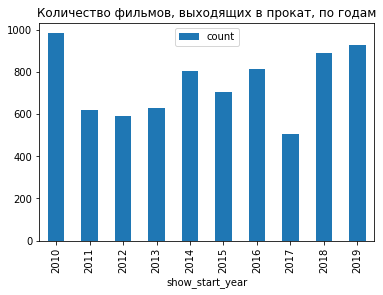

In [140]:
movies_each_year.plot(kind='bar');
plt.title('Количество фильмов, выходящих в прокат, по годам');

В 2010, 2018 и 2019 года было зарегестрировано больше всего фильмов (макисмум 2010 года - 985 фильмов), выходящих в прокат, в 2017 году - меньше всего (505 кинокартин). Однако в целом, не смотря на то, что присутствуют перепады, динамика выхода фильмов в российский кинопрокат равномерная.

In [141]:
print('В среднем с 2010 по 2019 года в прокат выходило', int(movies_each_year.median()[0]), 'фильмов ежегодно')

В среднем с 2010 по 2019 года в прокат выходило 756 фильмов ежегодно


Если же мы хотим посмотреть количество уникальных фильмов, которые выходили с 2010 по 2019 года (уникальных для каждого года, то есть исключить случаи, когда фильм вышел одновременно и в кинотеатре, и на DVD), то можно сгруппировать данные по году, удалить внутри каждого года дубликаты, посчитать количество уникальных фильмов для данного года и сохранить данные в датафрейм `movies_each_year_unique`  

Таким образом, мы сможем исключить случаи, когда фильм вышел в рамках одного года, но на разных носителях, оставив лишь 1 единственный уникальный экземпляр фильма в данных, для конкретного года. При этом, тот же самый фильм мог быть запущен в следующем году.

In [142]:
index_list = list()
count_list = list()

for year, data_grouped in data.groupby('show_start_year'):
    data_grouped = data_grouped.drop_duplicates(subset='title')
    count = data_grouped['show_start_date'].count()
    index_list.append(year)
    count_list.append(count)

movies_each_year_unique = pd.DataFrame({'count_unique': count_list}, index=index_list)

In [143]:
movies_each_year_unique #выведем таблицу с количеством уникальных фильмов для каждого года на экран

,count_unique
2010,818
2011,558
2012,556
2013,615
2014,766
2015,688
2016,782
2017,505
2018,884
2019,925


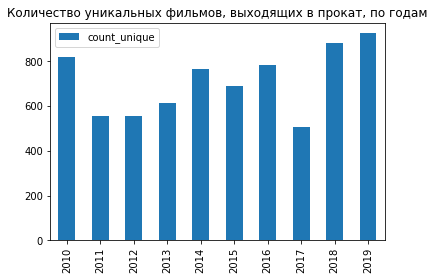

In [144]:
movies_each_year_unique.plot(kind='bar');
plt.title('Количество уникальных фильмов, выходящих в прокат, по годам');

In [145]:
print('В среднем с 2010 по 2019 года в прокат выходило', int(movies_each_year_unique.median()[0]), 'уникальных фильмов ежегодно')

В среднем с 2010 по 2019 года в прокат выходило 727 уникальных фильмов ежегодно


Сравним графики для уникальных и не-уникальных фильмов.

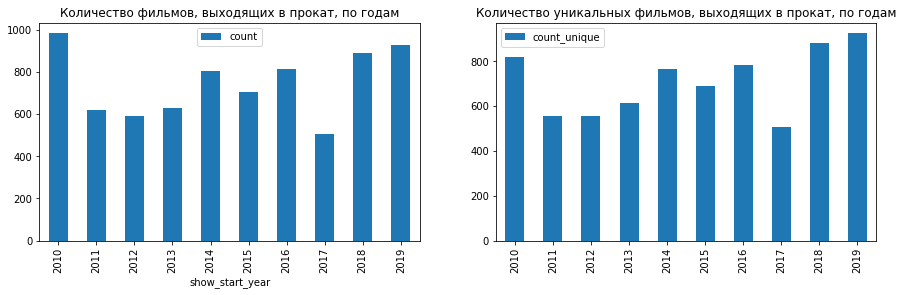

In [146]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_figwidth(15)

movies_each_year.plot(kind='bar', ax=ax1);
ax1.set_title('Количество фильмов, выходящих в прокат, по годам');

movies_each_year_unique.plot(kind='bar', ax=ax2);
ax2.set_title('Количество уникальных фильмов, выходящих в прокат, по годам');

В целом, соотношение похоже. Разница состоит лишь в том, что максимальное количество уникальных фильмов вышедших в прокат пришлось на 2019 год, на не на 2010.  
Незначительная разница есть также среднем количестве. Уникальных фильмов ежегодно выходило в среднем 727 штук, в то время как всего в прокат выходило среднем 756 фильмов.

Стоит также обратить внимание, что не все фильмы, выходящие в прокат в эти годы, были показаны в кинотеатрах.

In [147]:
print('Доля фильмов, которые вышли в прокат в кинотеатрах от общего количества фильмов, вышедших с 2010 по 2019 года:', 
      round(data.box_office.notna().sum() / data.shape[0], 2))

Доля фильмов, которые вышли в прокат в кинотеатрах от общего количества фильмов, вышедших с 2010 по 2019 года: 0.42


Видимо, остальные 58% фильмов выходили в прокат на иных носителях. 

**Краткое резюме**

Мы проанализировали динамику выхода фильмов в российский прокат по годам. Было выявлено, что:  
- В целом, несмотря на небольшие перепады, фильмы на протяжении 2010 - 2019 годов выходили равномерно. В среднем с 2010 по 2019 года в прокат выходило 756 фильмов ежегодно
- В 2010, 2018 и 2019 года было зарегестрировано больше всего фильмов, вышедших в прокат (макисмум 2010 года - 985 фильмов), в 2017 году - меньше всего (505 кинокартин)
- Что касается уникальных фильмов (для каждого года), картина похожая, лишь с небольшими отличиями:
  - Максимальное количество уникальных фильмов вышедших в прокат пришлось на 2019 года, на не на 2010.
  - Ежегодно в прокат выпускалось в среднем 727 кинокартин, в то время как всего в прокат выходило среднем 756 фильмов.
- Доля фильмов, которые вышли в прокат в кинотеатрах от общего количества фильмов, вышедших с 2010 по 2019 года составила 0.42

### Динамика проката фильмов. Сборы в кинотеатрах.

- *Изучите, как менялась динамика проката по годам. В каком году сумма сборов была минимальной? А максимальной?*

Сохраним срез данных с информацией о прокате фильмов в `data_cinema`

In [148]:
data_cinema = data[data.box_office.notna()]

data_cinema.loc[:, 'box_office'] = data_cinema.loc[:, 'box_office'].astype('int') #преобразуем столбец со сборами в формат integer

In [149]:
# Создадим сводную таблицу, в которой отобразим количество фильмов, вышедших в прокат, а также сумму сборов для каждого года.
data_cinema_pivot_count_min_max = data_cinema.pivot_table(index='show_start_year', 
                                                          values='box_office', 
                                                          aggfunc=['count', 'sum'])
# Переименуем столбцы сводной таблицы
data_cinema_pivot_count_min_max.columns = ['count', 'sum'] 

# Выведем таблицу на экран
data_cinema_pivot_count_min_max 

,count,sum
show_start_year,,
2010,105,2428654
2011,109,14102765
2012,128,6955423
2013,184,29799704
2014,279,7444951839
2015,465,39497365062
2016,526,47866299596
2017,357,48563707214
2018,475,49668402949


Сборы, полученные до 2014 года включительно кажутся подозрительно низкими. Посмотрим на фильмы, которые были выпущены в те года.

Для 2010 года.

In [150]:
data_cinema.query('show_start_year == 2010').head()

,puNumber,box_office,title,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,show_start_year,director_main,genre_main,share_gov_support
26,111000610,760,Золотое сечение,2010-01-26,Художественный,"ОАО ""ТПО ""Санкт-Петербургская студия документа...",Россия,С.Дебижев,"А.Тельнов, С.Федотов",16+,0,0,0,None,4.9,приключения,2010,С.Дебижев,приключения,NaN
40,111000810,14990,Легенда острова Двид,2010-01-28,Художественный,"ООО ""Студия ""А-фильм""",Россия,А.Мамедов,В.Хижнякова,0+,0,0,0,None,1.9,"детский,приключения,фантастика",2010,А.Мамедов,детский,NaN
44,111000910,32175,Буду помнить,2010-01-28,Художественный,"ООО ""ГРИНСИТИ""",Россия,В.Воробьев,А.Сафронов,16+,0,0,0,None,7.2,военный,2010,В.Воробьев,военный,NaN
56,111001110,4530,Ирония любви,2010-01-29,Художественный,"НП ""Генеральная дирекция международных кинофес...",Россия-Казахстан,"А.Черняев, Е.Рустембеков","Р.Давлетьяров, А.Котелевский, Е.Аманшаев",16+,0,0,0,None,5.2,"мелодрама,комедия",2010,А.Черняев,мелодрама,NaN
66,111001310,3980,Мы из будущего 2,2010-02-03,Художественный,"ООО ""А-1 Кино Видео""",Россия,"А.Самохвалов, Б.Ростов",Л.Кукоба,16+,0,0,0,None,5.6,"фантастика,боевик,приключения",2010,А.Самохвалов,фантастика,NaN


Для 2011 года.

In [151]:
data_cinema.query('show_start_year == 2011').head()

,puNumber,box_office,title,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,show_start_year,director_main,genre_main,share_gov_support
13,111000411,11740,"На крючке (""Номер 13"")",2011-01-14,Художественный,"ООО ""Продюсерская фирма Игоря Толстунова"", ООО...",Россия,Н.Углицких,И.Толстунов,16+,0,0,0,None,6.1,"комедия,мелодрама",2011,Н.Углицких,комедия,NaN
27,111000611,1790,Поцелуй сквозь стену,2011-01-20,Художественный,"ЗАО ""Продюсерский центр ""Парадиз""",Россия,В.Акобян,"Г.Нерсисян, А.Манасарян, А.Нерсесян",16+,0,0,0,None,4.3,"фантастика,мелодрама,комедия",2011,В.Акобян,фантастика,NaN
34,111000711,42691,Золотая рыбка в городе N,2011-01-19,Художественный,"ООО ""Кинокомпания Ибрус""",Россия,С.Пучинян,С.Пучинян,12+,0,0,0,None,4.3,"детский,фэнтези",2011,С.Пучинян,детский,NaN
61,111001211,8485,Выкрутасы,2011-02-04,Художественный,"ООО ""ТаББаК""",Россия,Л.Габриадзе,Т.Бекмамбетов,12+,0,0,0,None,6.3,"мелодрама,комедия,семейный",2011,Л.Габриадзе,мелодрама,NaN
67,111001311,200,Рейдер,2011-02-10,Художественный,"ООО ""Продюсерская фирма Игоря Толстунова"", ООО...",Россия,В.Аравин,"И.Толстунов, С.Астахова",16+,0,0,0,None,5.8,"драма,криминал",2011,В.Аравин,драма,NaN


Для 2012 года.

In [152]:
data_cinema.query('show_start_year == 2012').head()

,puNumber,box_office,title,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,show_start_year,director_main,genre_main,share_gov_support
6,111000212,200,Ржевский против Наполеона,2012-01-12,Художественный,"ООО ""Территория Кино""",Россия,М.Бальчунас,"ООО ""Квартал Леополис""",16+,0,0,0,None,3.0,комедия,2012,М.Бальчунас,комедия,NaN
14,111000412,1920,Орда,2012-01-26,Художественный,"Культурный фонд "" Кино-телекомпания "" Правосла...",Россия,А.Прошкин,Н.Гостюшина,16+,0,0,0,None,6.0,история,2012,А.Прошкин,история,NaN
20,111000512,6000,Белый Тигр,2012-02-10,Художественный,"ФГУП ""Киноконцерн ""Мосфильм""",Россия,К.Шахназаров,"К.Шахназаров, Г.Шадур",16+,0,0,0,None,7.2,"драма,криминал",2012,К.Шахназаров,драма,NaN
28,111000612,6775,Август. Восьмого,2012-02-07,Художественный,"ЗАО ""ПК ""ГЛАВКИНО""",Россия,Д.Файзиев,"Д.Файзиев, Ф.Бондарчук, И.Бачурин",12+,0,0,0,None,6.1,"драма,военный",2012,Д.Файзиев,драма,NaN
41,111000812,480,Духless,2012-02-07,Художественный,"ООО ""Киностудия ""Слово"", ООО ""Арт Пикчерс Студио""",Россия,Р.Прыгунов,"П.Ануров, Ф.Бондарчук, Д.Рудовский",18+,0,0,0,None,6.6,драма,2012,Р.Прыгунов,драма,NaN


Для 2013 года.

In [153]:
data_cinema.query('show_start_year == 2013').head()

,puNumber,box_office,title,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,show_start_year,director_main,genre_main,share_gov_support
0,111000113,2450,Тайна перевала Дятлова,2013-01-17,Художественный,"ООО ""Нон-Стоп Продакшн""",Россия,Ренни Харлин,"А.Роднянский, С.Мелькумов, С.Беспалов, Киа Джэм",16+,0,0,0,None,5.1,"ужасы,фантастика",2013,Ренни Харлин,ужасы,NaN
8,111000313,710,ОХОТА НА ПРИНЦЕССУ. Часть 2,2013-01-31,Художественный,"ООО Киностудия ""Сагиттариус - Д""",Россия,С.Дружинина,С.Дружинина,12+,0,0,0,None,6.1,"драма,история",2013,С.Дружинина,драма,NaN
15,111000413,7104,Метро_,2013-02-04,Художественный,"ООО ""Продюсерская фирма Игоря Толстунова""",Россия,А.Мегердичев,И.Толстунов,16+,0,0,0,None,7.2,"триллер,драма",2013,А.Мегердичев,триллер,NaN
21,111000513,779027,Что творят мужчины,2013-02-15,Художественный,"ООО ""Комедия Фильм""",Россия,С.Андреасян,"Г.Малков, С.Андреасян, Г.Андреасян, В.Поляков",18+,0,0,0,None,3.3,комедия,2013,С.Андреасян,комедия,NaN
29,111000613,4827,О чем молчат девушки,2013-02-20,Художественный,"ООО ""Продакшн Вэлью""",Россия,К.Оганесян,К.Оганесян,12+,0,0,0,None,2.8,комедия,2013,К.Оганесян,комедия,NaN


Для 2014 года.

In [154]:
data_cinema.query('show_start_year == 2014').head()

,puNumber,box_office,title,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,show_start_year,director_main,genre_main,share_gov_support
9,111000314,1607970,Чемпионы.,2014-01-15,Художественный,"ООО ""ЕМ Продакшн""",Россия,"А.Аксененко, Э.Никогосян, Д.Дюжев, А.Вакулов (...","Г.Малков, В.Поляков, Г.Андреасян, С.Андреасян",6+,0,0,0,None,5.9,"спорт,драма",2014,А.Аксененко,спорт,NaN
30,111000614,20400,Последнее лето,2014-01-22,Художественный,"ООО ""Продюсерский центр Киностудии им. М.Горьк...",Россия,Е.Звездаков,"С.Зернов, С.Кучмаева",18+,0,0,0,None,NaN,Unknown,2014,Е.Звездаков,Unknown,NaN
35,111000714,16255,Василиса,2014-01-22,Художественный,"ООО ""Кинокомпания ""Барабан""",Россия,А.Сиверс,Ю.Сапронов,12+,0,0,0,None,5.7,"история,мелодрама",2014,А.Сиверс,история,NaN
52,111001014,4295,Спираль.,2014-01-30,Художественный,"ООО ""Компания Питон""",Россия,А.Волгин,Е.Ковалева,12+,0,0,0,None,NaN,"аниме,мультфильм,ужасы",2014,А.Волгин,аниме,NaN
57,111001114,17790,Легок на помине,2014-02-10,Художественный,"ООО ""ЕМ Продакшн""",Россия,Е.Абызов,"Г.Малков, В.Поляков, Г.Андреасян, С.Андреасян",12+,0,0,0,None,5.0,"комедия,фантастика",2014,Е.Абызов,комедия,NaN


Если для каждого года c 2010 по 2013 посмотреть сборы фильмов, и произвести сравнение с сайтом кинопоиска, то становится понятно, что какие то числа указаны в десятках тыс. долларов, какие-то указаны в десятках тысяч рублей, а какие-то в тысячах рублей.  
Не удается провести однозначную границу, в каких единицах указаны сумму, так как даже внутри одного года одного месяца для одного фильма может быть указана сумму в тысячах рублей, а для другого в десятках тыс. долларов.  
С 2014 годом уже получается микс. Есть значения, которые правдободобны и указаны в рублях, но также встречается высокая доля значений, явно указанных в других единицах. В данном случае, его придется также исключить из анализа.  
Будем основываться на данных по сборам за 2015 - 2019гг.

Построим две гистограммы, на одной из которых отобразим количество фильмов, выходящих в прокат ежегодно с 2010 по 2019 года, а на второй - сумму сборов для каждого года в промежутке 2014-2019 гг.

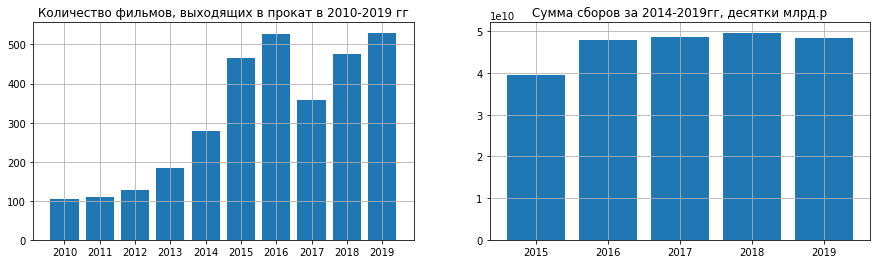

In [155]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_figwidth(15)

ax1.bar(x=data_cinema_pivot_count_min_max.index, height=data_cinema_pivot_count_min_max['count']);
ax1.set_xticks(data_cinema_pivot_count_min_max.index);
ax1.set_title('Количество фильмов, выходящих в прокат в 2010-2019 гг');
ax1.grid()

ax2.bar(x=data_cinema_pivot_count_min_max.loc[2015:2019, 'sum'].index, 
        height=data_cinema_pivot_count_min_max.loc[2015:2019, 'sum']);
ax2.set_xticks(data_cinema_pivot_count_min_max.loc[2015:2019, 'sum'].index);
ax2.set_title('Сумма сборов за 2014-2019гг, десятки млрд.р');
ax2.grid()

Больше всего фильмов вышло в прокат в кинотеатрах в 2019 году. Их количество составило 530 кинокартин.  
Меньше всего фильмов вышло в прокат в кинотеатрах 2010 году. Их количество составило 105 кинокартин.  

Максимальная сумма сборов с 2015 по 2019гг была зафиксирована в 2018 году и составила 49,7 млрд. р.  
Минимальная сумма сборов с 2015 по 2019гг пришлась на 2015 год и составила 39 млрд.р 

- С помощью сводной таблицы посчитайте среднюю и медианную сумму сборов для каждого года.

Создадим сводную таблицу, в которой отбразим среднее и медианнные значения сборов для 2015-2019гг. Созраним ее вв переменную `data_cinema_pivot_mean_median`

In [156]:
data_cinema_pivot_mean_median = data_cinema.query('2015 <= show_start_year <= 2019').pivot_table(index='show_start_year', 
                                                          values='box_office', 
                                                          aggfunc=['mean', 'median']) 

# Переименуем стобцы
data_cinema_pivot_mean_median.columns = ['mean', 'median']

# Для удобства приведем столбtw 'mean' к целочисленному формату
data_cinema_pivot_mean_median.loc[:, 'mean'] = data_cinema_pivot_mean_median.loc[:, 'mean'].astype('int')

# Выведем таблицу на экран
data_cinema_pivot_mean_median 

,mean,median
show_start_year,,
2015,84940570,4920933
2016,91000569,3846679
2017,136032793,9968340
2018,104565058,8891102
2019,91369261,4627798


Отобразим значения из сводной таблицы на графиках.

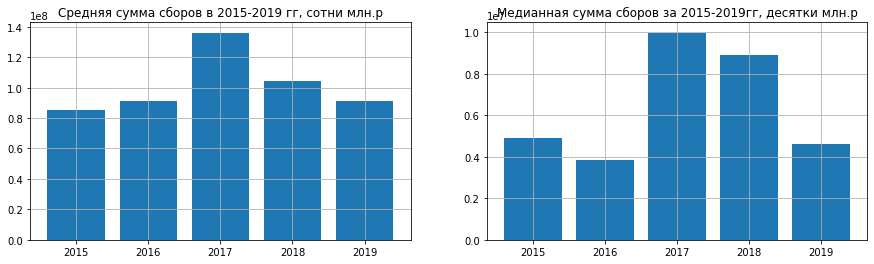

In [157]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_figwidth(15)

ax1.bar(x=data_cinema_pivot_mean_median.index, 
        height=data_cinema_pivot_mean_median['mean']);
ax1.set_xticks(data_cinema_pivot_mean_median.index);
ax1.set_title('Средняя сумма сборов в 2015-2019 гг, сотни млн.р');
ax1.grid()

ax2.bar(x=data_cinema_pivot_mean_median.index, 
        height=data_cinema_pivot_mean_median['median']);
ax2.set_xticks(data_cinema_pivot_mean_median.index);
ax2.set_title('Медианная сумма сборов за 2015-2019гг, десятки млн.р');
ax2.grid()

Наибольшая средняя и медианные сумммы сборов пришлись на 2017 год и составили 136 млн.р и 9,96 млн.р соотвественно.  
Наименьшая средняя сумма сборов пришлась на 2015 год и составила 84,9 млн.р., в то время как наименьшая медианная сумма сборов пришлась на 2016 год и составила 3,8 млн.р.  

Посмотрим как будут выглядеть средняя и медианная сумма сборов для каждого года на одном графике.

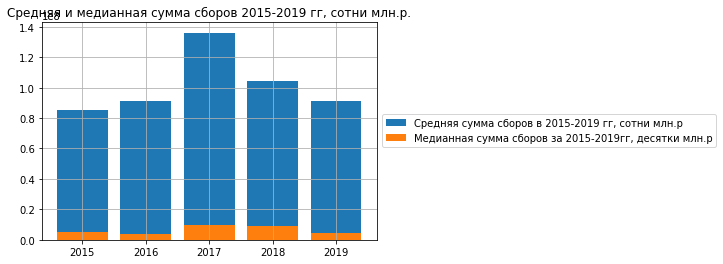

In [158]:
fig, ax1 = plt.subplots(1, 1)

ax1.bar(x=data_cinema_pivot_mean_median.index, 
        height=data_cinema_pivot_mean_median['mean'], 
       label='Средняя сумма сборов в 2015-2019 гг, сотни млн.р');

ax1.bar(x=data_cinema_pivot_mean_median.index, 
        height=data_cinema_pivot_mean_median['median'], 
        label='Медианная сумма сборов за 2015-2019гг, десятки млн.р');

ax1.set_title('Средняя и медианная сумма сборов 2015-2019 гг, сотни млн.р.');
ax1.set_xticks(data_cinema_pivot_mean_median.index);
ax1.grid()
plt.legend(bbox_to_anchor=(1, 0.6));

Невооруженным вглядом видна большая разница между медианными и средним количеством сборов.  
Это можно объяснить тем, что в один и тот же год может выйти как обыкновенный фильм, так и "бестселлер".  
Мы специально не очищали данные от выбросов в столбце "сумма сборов", так как нам важно видеть, в какие года выходили такие бестселлеры и учитывать их.  
Если же мы хотим знать средние сборы, характерные для большинства фильмов выборки, то мы можем посмотреть на значение медианы, так как она более устойчива к выбросам.

**Краткое резюме**

Мы изучили, как менялась динамика проката по годам, а также посчитали среднюю и медианную сумму сборов для каждого года. При этом, для анализа сборов кинокартин мы строили расчеты исключительно на данных за 2015-2019гг, так как для 2010-2014гг провести аналих и сравнение не представлялось возможным, в следствие того, что значения указаны в соверщенно произвольных единицах измерения. В результате было выявлено, что:  
- Максимальное количество фильмов вышлов прокат в 2019 году и составило 530 кинокартин.
- Минимальное количество фильмов было выпущено в прокат в 2010 году и составило 105 картин.
- Максимальная сумма сборов (в период с 2015 по 2019гг) была зафиксирована в 2018 году и составила 49,7 млрд. р. 
- Минимальная сумма сборов была зафиксирована в 2015 год и составила 39 млрд.р  

Что касается средних показателей, то:  
- Наибольшая средняя и медианные сумммы сборов были зафиксированы в 2017 год и составили 136 млн.р и 9,96 млн.р соотвественно. 
- Наименьшая средняя сумма сборов была получена в 2015 год и составила 84,9 млн.р., в то время как наименьшая медианная сумма сборов пришлась на 2016 год и составила 3,8 млн.р.  

### Влияние возрастного ограничения на сборы фильмов в прокате в период с 2015 по 2019 года.

- Определите, влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год? Фильмы с каким возрастным ограничением собрали больше всего денег в прокате? 
- Меняется ли картина в зависимости от года? Если да, предположите, с чем это может быть связано.

#### Посмотрим, влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год?

Сохраним срез данных за 2015-2019 год, для фильмов, которые показывались в кинотеатрах в переменную `data_cinema_15_19`

In [159]:
data_cinema_15_19 = data_cinema.query('2015 <= show_start_year <= 2019')

Создадим сводную таблицу, в которой отобразим медианные сборы для каждой возрастной категории фильмов. Отсортируем таблицу по убыванию медианных сборов. Сохраним в переменную `data_cinema_pivot_age_box`

In [160]:
data_cinema_pivot_age_box = data_cinema_15_19.pivot_table(index='age_restriction', 
                                                           values='box_office', 
                                                           aggfunc=['median'])

data_cinema_pivot_age_box.columns = ['median']

data_cinema_pivot_age_box = data_cinema_pivot_age_box.sort_values(by='median', ascending=False)

data_cinema_pivot_age_box

,median
age_restriction,
6+,13736207
18+,6154439
16+,5600007
12+,5065044
0+,2943318


Отобразим значения из таблицы на графике.

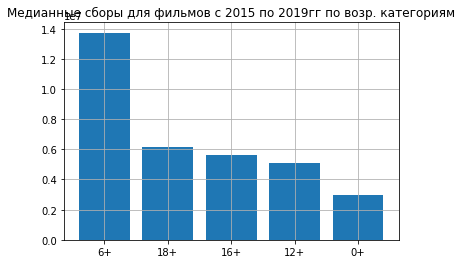

In [161]:
plt.bar(x=data_cinema_pivot_age_box.index, height=data_cinema_pivot_age_box['median']);
plt.grid()
plt.title('Медианные сборы для фильмов с 2015 по 2019гг по возр. категориям');

На графике видно, что есть разница между медианными сборами для каждой возрастной категории.  
Наибольшие медианные сборы приходятся на фильмы с возрастным ограничением 6+ (13,7 млн.р), минимальные - на фильмы для всех возрастов (0+) (2,9 млн. р.)   
При этом, между фильмами 18+, 16+ и 12+ разница в медианных сборах незначительна.

В чем может быть причина такой разницы? Посмотрим на типы фильмов, которые в основном были сняты для тех или иных возрастных категорий.

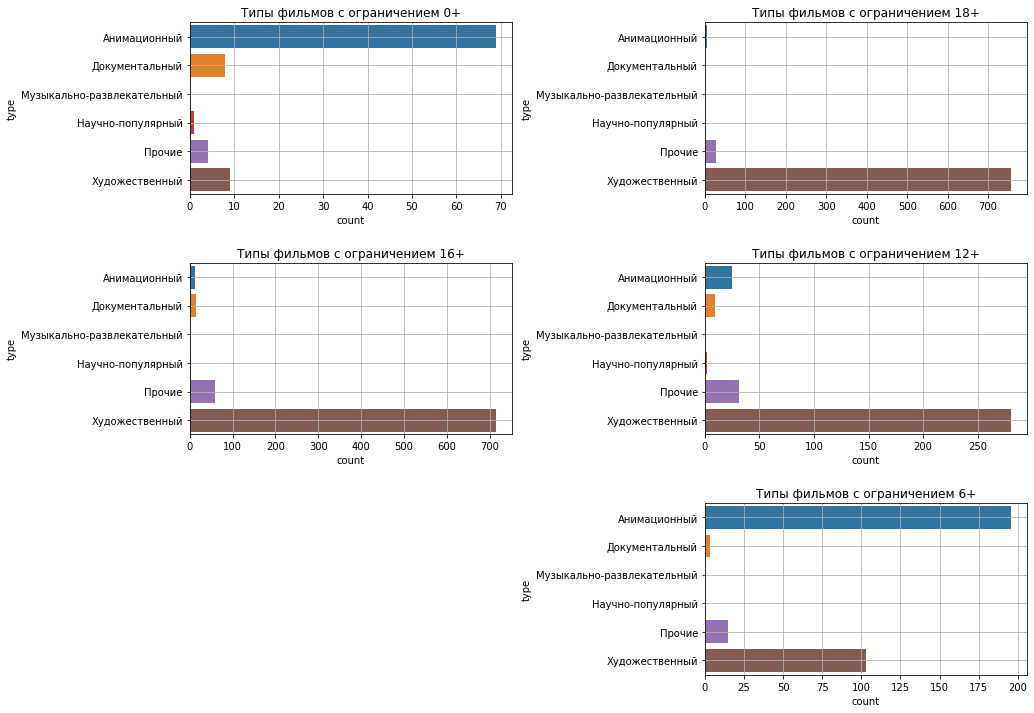

In [165]:
fig, ((ax1, ax3), (ax2, ax4), (ax5, ax6)) = plt.subplots(3, 2)
fig.set_figwidth(15)
fig.set_figheight(12)
plt.subplots_adjust(wspace=0.6, hspace=0.4)


list_age = data_cinema_15_19.age_restriction.unique().to_list()
list_axes = [ax1, ax2, ax3, ax4, ax6]
for i, j in enumerate(list_axes):
    sns.countplot(y=data_cinema_15_19.query('age_restriction == @list_age[@i]')['type'], ax=j);
    j.set_title(f'Типы фильмов с ограничением {list_age[i]}')
    j.grid()

fig.delaxes(ax5)

Хорошо видно, что категория фильмов "6+" сочетают в себе в большей степени анимационные кинокартины и художественные, в соотношении 2 к 1. Высокие сборы вполне объяснимы. Взрослые с детьми ходят на мультики, взрослые с детьми ходят на художественные фильмы. Плюс, на такие художественные фильмы могу ходить и взрослые отдельно. Благодаря этому, увеличивается количество посетителей на 1 фильм.  

К категории "0+" (для всех возрастов) больше всего относятся мультики. Однако в гораздо меньшей степени к ней относятся художественные фильмы, что уже обрезает большую часть аудитории (соотношение мультфильмов к художественным составляет 7 к 1). Так же к категории "0+" относятся документальные фильмы. Можно предположить, что такой тип фильмов не привлекает к просмотру масссовую аудиторию.  

Для категории "16+" и "18+" типы похожи - в основном это художественные фильмы.

Возможно, картина станет чуть более понятной, если мы посмотрим на основные жанры фильмов.

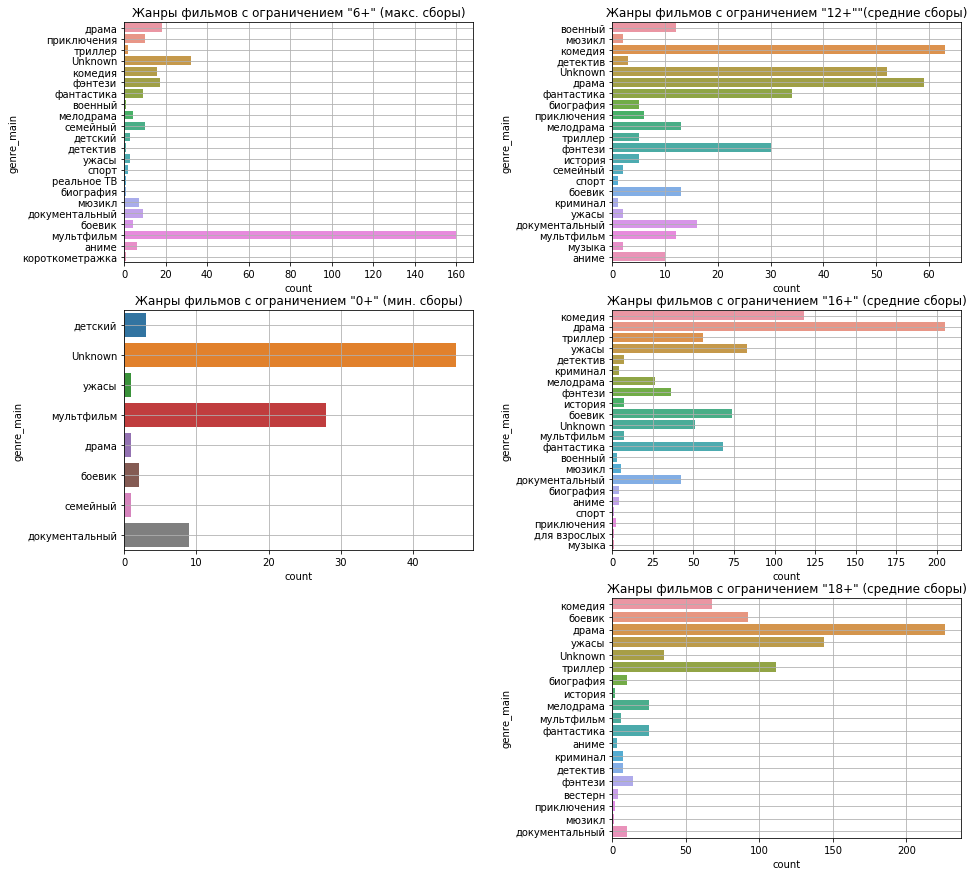

In [166]:
fig, ((ax1, ax3), (ax2, ax4), (ax5, ax6)) = plt.subplots(3, 2)
fig.set_figwidth(15)
fig.set_figheight(15)
plt.subplots_adjust(wspace=0.4, hspace=0.2)

sns.countplot(y=data_cinema_15_19.query('age_restriction == "6+"')['genre_main'], ax=ax1);
ax1.set_title('Жанры фильмов с ограничением "6+" (макс. сборы)')
ax1.grid()

sns.countplot(y=data_cinema_15_19.query('age_restriction == "0+"')['genre_main'], ax=ax2);
ax2.set_title('Жанры фильмов с ограничением "0+" (мин. сборы)');
ax2.grid()

sns.countplot(y=data_cinema_15_19.query('age_restriction == "12+"')['genre_main'], ax=ax3);
ax3.set_title('Жанры фильмов с ограничением "12+""(средние сборы)')
ax3.grid()

sns.countplot(y=data_cinema_15_19.query('age_restriction == "16+"')['genre_main'], ax=ax4);
ax4.set_title('Жанры фильмов с ограничением "16+" (средние сборы)');
ax4.grid()

sns.countplot(y=data_cinema_15_19.query('age_restriction == "18+"')['genre_main'], ax=ax6);
ax6.set_title('Жанры фильмов с ограничением "18+" (средние сборы)');
ax6.grid()

fig.delaxes(ax5)

Теперь ясно становится видно, что к категории, которая получила максимальные средние сборы в большей степени относятся мультфильмы.  

Для категории "0+", которые получили минимальные средние сборы в большей степени относятся фильмы с неопределенным (или неизвестным) жанром, а также мультфильмы и документальные фильмы. Также, можно предположить, что, мультфильмы "0+" менее интересны широкой аудитории нежели мультфильмы "6+". 

К основным общим жанрам фильмов с ограничениями 12-16+ относятся в основном драмы, комедии, ужасы.  

Кстати, посмотрим, какой рейтинг в основном у фильмов с жанром `Unknown`

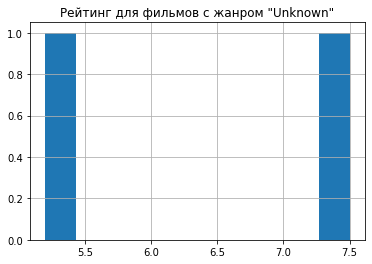

In [167]:
data_cinema_15_19.query('genre_main == "Unknown"')['ratings'].hist();
plt.title('Рейтинг для фильмов с жанром "Unknown"');

Всего 2 значения. А что же все остальные?

In [168]:
data_cinema_15_19.query('genre_main == "Unknown"')['ratings'].isna().sum()

214

А остальные - 214 пропусков. Видимо, для фильмов с жанром "Unknown" на момент выгрузки данных было недостаточно отзывов, чтобы сформировался рейтинг.

#### Посмотрим, меняется ли картина в зависимости от года

Построим сводную таблицу, в которой для каждой возрастной категории для каждого года рассчитаем медианные сборы в кинотеатрах.

In [169]:
data_cinema_15_19_pivot_age_year_box =  data_cinema_15_19.pivot_table(index='age_restriction', 
                                                                      columns='show_start_year', 
                                                                      values='box_office', 
                                                                      aggfunc='median')

data_cinema_15_19_pivot_age_year_box.columns = [2015, 2016, 2017, 2018, 2019]

data_cinema_15_19_pivot_age_year_box

,2015,2016,2017,2018,2019
age_restriction,,,,,
0+,2943318.0,2571294.0,22178956.0,3616937.0,3885434.0
12+,15351562.0,4690635.0,9010548.0,8931965.0,3405545.0
16+,4676819.0,5133021.0,9702077.0,9010638.0,3210717.5
18+,4616614.5,6107001.0,8212677.0,7179466.0,5603216.0
6+,20380982.0,3026256.0,51992103.0,14688850.0,12875350.0


Для более наглядной картины, построим график, на котором по оси Х отложим года, для каждого года рассчитаем медианный сбор фильмов для каждой возрастной категории. И посмотрим на разницу.

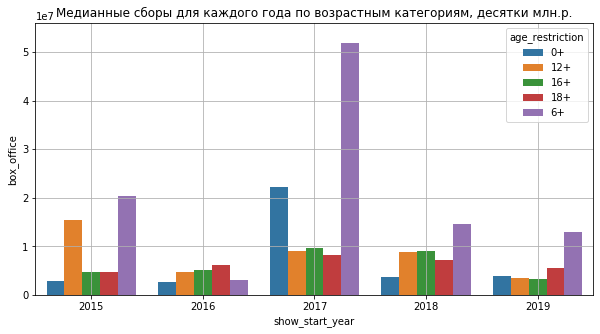

In [170]:
fig, ax1 = plt.subplots()

fig.set_figwidth(10)
fig.set_figheight(5)

sns.barplot(data=data_cinema_15_19, 
            x='show_start_year', 
            y='box_office', 
            estimator=np.median, 
            hue='age_restriction', 
            ax=ax1, errwidth=0.001);
ax1.grid()
ax1.set_title('Медианные сборы для каждого года по возрастным категориям, десятки млн.р.')
ax1.set_ylim(0, 56000000);

Если смотреть статистику по годам, то картина различается от той, которую мы видели для всех лет одновременно.  
В некоторые года есть значительные отличия:  
- В 2015 году фильмы с категорией 12+ вырвались на второе место по средним сборам.
- В 2016 году максимальные средние сборы получили фильмы с категорией "18+" (в то время как фильмы с категорией 6+ оказались вторыми с конца!). В целом, разница между сборами за этот год незначительная.
- В 2017 году минимальные средние сборы получили фильмы с категорией 18+ (в то время как фильмы с категорией 0+ вырвались на второе место по сборам!)
- В 2019 году минимальные средние сборы получили фильмы с категорией 16+.

В чем может быть причина?  
Мы уже знаем, что для разных возрастных категорий как правило выходят фильмы под разными жанрами. Можно предположить, что в некоторые года в том или ином жанре появлялся один или несколько фильмов-бестселлеров, которые собрали высокие кассовые сборы. В следствие этого, график сборов для возрастной категории, для которой выходил фильм показывает чуть большие показатели, нежели в среднем по всем годам.  
То же работает и в обратную сторону.

**Краткое резюме**

На данном этапе мы изучили влияние возрастного ограничения на сборы фильмов в прокате с 2015 по 2019 гг. Было выявлено, что:  
- Фильмы с возрастным ограничение "6+" собирали в среднем максимальное количество сборов на протяжении 2015-2019 гг. К категории "6+" по большей части относились мультфильмы, и в меньшей части - художественный фильмы (соотношение мультфилмов к художественным фильма сотавляет 2 к 1). Возможно, правильнее было бы сказать, что влияние имеет "возрастное ограничение + жанр" кинокартины.
- Меньше всего в среднем собрали фильмы с возрастным ограничением "0+". К таким фильмам относились фильмы неизвестного жанра, мультфильмы, а также документальные фильмы.
- При этом, если смотреть сборы фильмов по возрастным рейтингам, то картина внутри каждого года немного различается. Это можно связать с тем, что в определенные года в различных жанрах могут появляться фильмы-бестселлеры. Будучи в рамках определенной возрастной категории, они могут значительно сдвигать график для данной возрастной категории в рамках определенного года в большую сторону по сборам. То же справедливо и в обратную сторону.

## Шаг 4. Исследуем фильмы, которые получили государственную поддержку

*На этом этапе нет конкретных инструкций и заданий — поищите интересные закономерности в данных. Посмотрите, сколько выделяют средств на поддержку кино. Проверьте, хорошо ли окупаются такие фильмы, какой у них рейтинг.*

На первом этапе, исследуем кассовые сборы, сумму вложенных средств и их окупаемость. Мы изучим:  
- Какое количество фильмов получало господдержку ежегодно.  
- Каковы средние показатели и распределение денежных средств, которое государство выделяло на фильмы.
- Как распределена поддержка между Фондом Кино и Министерством Культуры.
- Фильмы каких жанров предпочитают поддерживать Фонд Кино и Министерство Культуры
- Каковы суммарные и средние сборы за фильм для каждой из организаций. Фильмы, получившие поддержку какого из ведомств чаще окупались?
- Фильмы каких жанров чаще всего окупали возвратные средства, а какие наоборот - чаще не окупали.
- Какую долю в среднем составляют государственные средства в общем бюджете фильма.
- Зависит ли сумма сборов от размера государственной поддержки?
- Существует ли зависимость величины кассовых сборов от размера бюджета фильма.
- Существует ли зависимость величины сборов от величины доли государственных денег в бюджете фильма.

На втором этапе, коснемся вопросов, больше связанных с рейтингом фильмов, получивших государственную материальную поддержку. Изучим:
- Какой рейтинг в среднем получают фильмы, которые получили поддержку от государства. Отличается ли он от среднего рейтинга фильмов, не получивших поддержки государства?
- Есть ли зависимость между рейтингом фильма и организацией, которая поддержала его выход?
- Влияет ли бюджет фильма на его рейтинг?
- Влияет ли количество денег, вложеных государством на рейтинг фильма?
- Влияет ли доля государственных денег в бюджете фильма на его рейтинг?

### Ознакомление с данными. Подготовка данных

Вначале, чтобы узнать, сколько в среднем выдяли средств на фильм государство, создадим столбец `gov_money`, в который сохраним сумму из столбцов `refundable_support` и `nonrefundable_support`

In [171]:
data['gov_money'] = data['refundable_support'] + data['nonrefundable_support']

Создадим срез данных для фильмов, с господдержкой и созраним его в переменную `data_gov`

In [172]:
data_gov = data.query('financing_source != "None"')

А также для фильмов, которые не получали средств от государства.

In [173]:
data_nongov = data.query('financing_source == "None"')

Посмотрим, для скольких фильмов не указаны сборы в срезе данных фильмов, получивших господдержку

In [174]:
data_gov.box_office.isna().sum()

14

14 фильмов не имеют инофрмации о сборах. Создадим также срез данных, в котором будут только фильмы, вышедшие в прокат в кинотеатрах. Сохраним срез в переменную `data_gov_cinema`

In [175]:
data_gov_cinema = data_gov[data_gov.box_office.notna()]

data_gov_cinema.loc[:, 'box_office'] = data_gov_cinema.loc[:, 'box_office'].astype('int') #преобразуем столбец со сборами в формат integer

Добавим в таблицу `data_gov_cinema` столбец, в котором посчитаем возврат средств от инвестированных государством денег.  
Рассчитаем показатель следующим образом: (`box_office`- `gov_money`) / `gov_money`. Таким образом мы узнаем сколько фильм получил доход на каждый вложенный государством рубль.
Сохраним данные в столбец `roi`

In [176]:
data_gov_cinema['roi'] = round((data_gov_cinema['box_office'] - data_gov_cinema['gov_money']) / data_gov_cinema['gov_money'], 2)

Также, создадим булевый столбец `is_refunded`, в котором отобразим, окупились ли затраты на возвратные средства со сборов.

In [177]:
data_gov_cinema['is_refunded'] = data_gov_cinema['box_office'] >= data_gov_cinema['refundable_support']

In [178]:
data_gov_cinema.head(3)

,puNumber,box_office,title,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,show_start_year,director_main,genre_main,share_gov_support,gov_money,roi,is_refunded
1,111000115,61040,Небесный верблюд,2015-01-14,Художественный,"ООО Продюсерский центр ""Всё хорошо""",Россия,Ю.Фетинг,И.Плиско,0+,0,34000000,49280496,МК,6.7,"детский,семейный",2015,Ю.Фетинг,детский,0.69,34000000,-1.00,True
2,111000116,153030013,"Статус: ""Свободен""",2016-01-13,Художественный,"ООО ""Кинодом""",Россия,П.Руминов,"С.Ливнев, Д.Козловский, С.Бобза",16+,20000000,20000000,78686500,ФК,5.8,"комедия,мелодрама",2016,П.Руминов,комедия,0.51,40000000,2.83,True
3,111000117,12260956,После тебя,2017-01-10,Художественный,"Компания Production Value WorldWide (ООО ""ПРОД...",Россия,А.Матисон,С.Безруков,16+,7000000,20000000,45483233,"МК, ФК",6.7,драма,2017,А.Матисон,драма,0.59,27000000,-0.55,True


Посмотрим на размер датафреймов

In [179]:
data_gov.shape # Данные о фильмах, получивших господдержку

(332, 21)

In [180]:
data_gov_cinema.shape # Данные о фильмах, получивших господдержку, исключительно с указанными кассовыми сборами

(318, 23)

Итак, всего 332 фильма получили господдержку. Из них 318 были показаны в кинотеатрах.

Проверим, есть ли дубликаты для датафрейма `data_gov` в стобце `title`

In [181]:
print('Количество дубликатов в столбце title:', data_gov.duplicated(subset='title').sum())

Количество дубликатов в столбце title: 0


Если в рамках исследования нам будет необходимо обратиться к кассовым сборам - мы будем использовать датафрейм `data_gov_cinema`. Если в кассовых сборах не будет необходимости, то будем использовать `data_gov`.

### Исследовательский анализ. Анализ кассовых сборов, затрат и окупаемости вложенных средств.

#### Какое количество фильмов получало господдержку ежегодно.

Построим сводную таблицу, в которой отобразим год и количество фильмов, которые получили деньги от государства.

In [182]:
data_gov.pivot_table(index='show_start_year', values='gov_money', aggfunc='count')

,gov_money
show_start_year,
2013,2
2014,16
2015,86
2016,61
2017,41
2018,56
2019,70


В нашем срезе данных присутствуют данные за 2013 - 2019 года.  

Проверим, насколько правдободобны кассовые сборы за 2013-2014 года для нашей выборки.

In [183]:
data_gov.query('show_start_year <= 2014')[['title', 'box_office']]

,title,box_office
152,Бесславные придурки,28140.0
189,Невидимки,19957031.5
193,БЕРЦЫ,55917.5
200,Братья Ч,232100.0
251,Пока еще жива,365353.6
370,Дедушка моей мечты,6277796.2
410,Смайлик,554251.0
458,Левиафан.,88120041.1
583,Две женщины,4731239.5
594,Исповедь Z@drota,1523750.0


Как это ни удивительно, они вполне правдоподобны, и схожи с реальными показателями, которые размещены на сайте Кинопоиск.  
Значит, для выбранного среза мы можем оставить данные за эти года в датафрейме.

**Больше всего фильмов получили господдержку в 2015 году (86 фильмов), меньше всего - в 2013 (всего лишь 2 фильма).**

#### Каковы средние показатели и распределение денежных средств, которое государство выделяло на фильмы.

Посмотрим на описательные статистики для столбца `gov_money` датафрейма `data_gov`

In [184]:
data_gov.gov_money.describe().astype('int')

count          332
mean      60845446
std       72755459
min        3000000
25%       25333750
50%       35000000
75%       60000000
max      500000000
Name: gov_money, dtype: int64

Посмотрим на распределение.

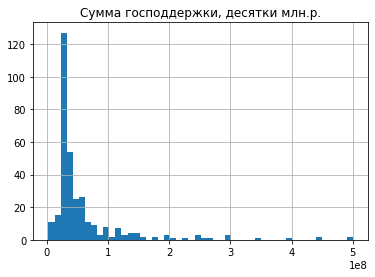

In [185]:
data_gov.gov_money.hist(bins=50);
plt.title('Сумма господдержки, десятки млн.р.');

Хорошо видна медиана в области 30-40 млн.р, и длинный хвост из более редких фильмов, получивших большую сумму, из-за которого наблюдается такое сильное отклонение среднего от медианы.

**Средняя сумма, которая выделялась государством на поддержку фильмов - 35 млн.р. (в соответсвии с медианой)  
Лишь 25% фильмов получили поддержку свыше 60 млн.р.  
Минимальная сумма, которую государство выделяло на фильм с 2013 по 2019 года - 3 млн.р. Максимальная - 500 млн.р.**

#### Как распределена поддержка между Фондом Кино и Министерством Культуры.

Построим сводную таблицу, в которой отобразим количество фильмов, которое проспонсировало каждое из ведомств, а также средний объем вложенных средств на 1 фильм.

In [186]:
data_gov.pivot_table(index='financing_source', values='gov_money', aggfunc=['count', 'median']).iloc[1:4, :]

,count,median
,gov_money,gov_money
financing_source,,
МК,164,28000000.0
"МК, ФК",22,47751149.5
ФК,146,60000000.0


- Чаще всех выделяло средства Министерство Культуры. Реже всего фильмы получали подержку из обеих источников.  
- Фонд Кино в среднем выдялял в два раза больше денег на поддержку фильмов, нежели Министерство Культуры (60 млн.р. против 28 млн.р.).  
- Совместно они выделяли в среднем немногим меньше, чем Фонд Кино - 47,7 млн.р.

#### Фильмы каких жанров предпочитают поддерживать Фонд Кино и Министерство Культуры

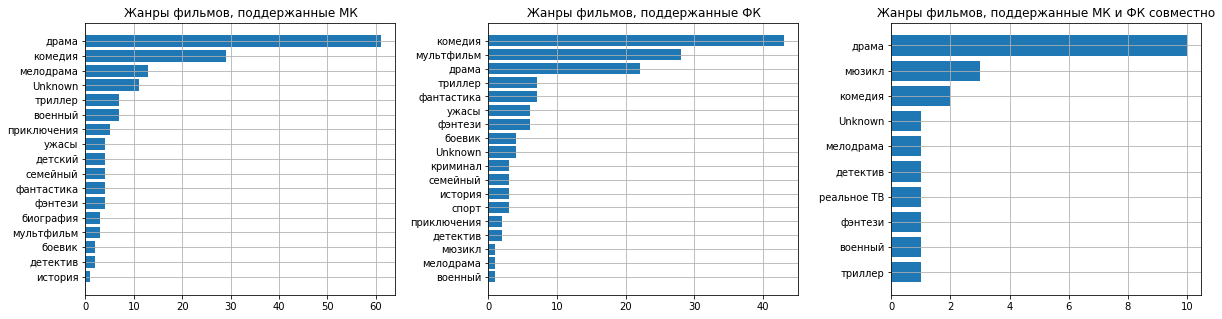

In [187]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
fig.set_figwidth(20)
fig.set_figheight(5)
plt.subplots_adjust(wspace=0.3, hspace=0.2)

ax1.barh(data_gov.query('financing_source == "МК"').genre_main.value_counts(ascending=True).index, 
         width=data_gov.query('financing_source == "МК"').genre_main.value_counts(ascending=True))
ax1.set_title('Жанры фильмов, поддержанные МК')
ax1.grid()

ax2.barh(data_gov.query('financing_source == "ФК"').genre_main.value_counts(ascending=True).index, 
         width=data_gov.query('financing_source == "ФК"').genre_main.value_counts(ascending=True))
ax2.set_title('Жанры фильмов, поддержанные ФК');
ax2.grid()

ax3.barh(data_gov.query('financing_source == "МК, ФК"').genre_main.value_counts(ascending=True).index, 
         width=data_gov.query('financing_source == "МК, ФК"').genre_main.value_counts(ascending=True))
ax3.set_title('Жанры фильмов, поддержанные МК и ФК совместно')
ax3.grid()

Топ 3 жанра, поддержанных Министерством Культуры:
- Драма
- Комедия
- Мелодраммы

Топ 3 жанра, поддержанных Фондом Кино:
- Комедия
- Мультфильм
- Драма

Топ 3 жанра, получивших поддержку от обоих источников:
- Драма (как ни удивительно, этот жанр встретился в топ 3 каждого из источников)
- Мюзикл
- Комедия

**Можно предположить, что Фонд кино в основном отдает предпочтения комедиям (и чуть в меньшей степени мультфильмам), а Министерство Культуры - драмам (и в меншьей степени комедиям). Совместную поддежрку чаще всего получали фильмы из жанра "драма"**

#### Каковы суммарные и средние сборы за фильм для каждой из организаций. Фильмы, получившие поддержку какого из ведомств чаще окупались?

Построим сводную таблицу `data_gov_cinema_pivot_roi`, в которой отобразим средние сборы, суммарные сборы, процент фильмов, которые окупили свою "возвратную" часть государственных средств (ведь именно эту часть государство хочет получить обратно), а также среднюю окупаемость вложенных государством денежных средств в целом.

In [188]:
data_gov_cinema_pivot_roi = data_gov_cinema.pivot_table(index='financing_source', 
                                                        aggfunc={'box_office': ['sum', 'median'], 
                                                                 'roi': 'median', 
                                                                 'is_refunded': 'mean'}).iloc[1:4, :]

data_gov_cinema_pivot_roi.columns = ['box_office_med', 'box_office_sum', 'is_refunded', 'roi_med']

data_gov_cinema_pivot_roi['box_office_sum'] = data_gov_cinema_pivot_roi['box_office_sum'].astype('int')

data_gov_cinema_pivot_roi

,box_office_med,box_office_sum,is_refunded,roi_med
financing_source,,,,
МК,1830820.0,5322018289,1.000000,-0.930
"МК, ФК",9201589.5,805338412,0.590909,-0.825
ФК,85888273.5,35986152781,0.881944,0.410


Для более наглядной картины отразим получившиеся результаты на графиках.

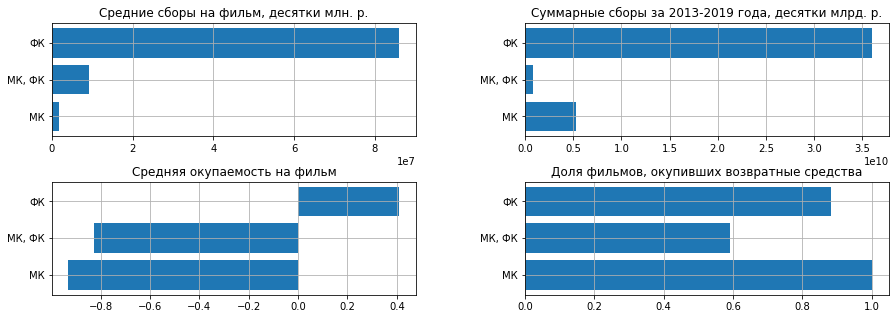

In [189]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
fig.set_figwidth(15)
fig.set_figheight(5)
plt.subplots_adjust(wspace=0.3, hspace=0.4)

ax1.barh(data_gov_cinema_pivot_roi['box_office_med'].index, width=data_gov_cinema_pivot_roi['box_office_med'])
ax1.set_title('Средние сборы на фильм, десятки млн. р.')
ax1.grid()

ax2.barh(data_gov_cinema_pivot_roi['box_office_sum'].index, width=data_gov_cinema_pivot_roi['box_office_sum'])
ax2.set_title('Суммарные сборы за 2013-2019 года, десятки млрд. р.')
ax2.grid()

ax3.barh(data_gov_cinema_pivot_roi['roi_med'].index, width=data_gov_cinema_pivot_roi['roi_med'])
ax3.set_title('Средняя окупаемость на фильм');
ax3.grid()

ax4.barh(data_gov_cinema_pivot_roi['is_refunded'].index, width=data_gov_cinema_pivot_roi['is_refunded'])
ax4.set_title('Доля фильмов, окупивших возвратные средства');
ax4.grid()

Что мы можем пронаблюдать: 
- Фильмы, в которые вложился Фонд Кино получили максимальные средние (медианные) сборы на 1 фильм (85,9 млн. р.). Фильмы, профинансированные Министерством Культуры собрали наименьшие - 1,8 млн. р. в среднем на фильм.
- Максимальное количество денег в период 2013-2019 гг также собрали фильмы, профинансированные Фондом Кино: 36 млрд. р. Наименьшее - фильмы, получившие финансирование из обоих источников: 805 млн.р. за 7 лет.
- Наилучшую окупаемость показали фильмы от Фонда Кино: их окупаемость составила в среднем 41% на финансированные средства. Наихудшую окупаемость показали фильмы, получившие финансирование от Министерства Культуры.
- Однако, что касается окупаемости средств, подлежащих возврату - ситуация немного иная:
  - Фильмы от Министерства Культуры в 100% случаев окупили возвратные средства.
  - Фильмы от Фонда Кино окупили возвратные средства лишь в 88% случаев, в то время как фильмы, профинансированные совместно окупились в 59% случаев

Посмотрим, сколько раз Министерство Культуры самостоятельно давало средства, подлежащие возврату

In [190]:
data_gov_cinema.query('refundable_support != 0 and financing_source == "МК"').shape[0]

0

Министерство культуры ни разу не выделяло возвратных средств самостоятельно. Теперь понятно, откуда такой показатель.

#### Фильмы каких жанров чаще всего окупали возвратные средства, а какие наоборот - чаще не окупали.

Посмотрим для начала общее соотношение фильмов, окупивших и не окупивших возвратные средства.

In [191]:
data_gov_cinema.is_refunded.value_counts(normalize=True)

True     0.918239
False    0.081761
Name: is_refunded, dtype: float64

91.8% фильмов смогли окупить сумму, необходимую к возврату государству.

Построим 2 графика, на одном из которых отобразим наиболее часто встречающиеся жанры среди фильмов, которые окупили средства государства, подлежащие возврату, а на другом - наиболее часто встречающиеся жанры среди фильмов, которые их не окупили.  
Построим графики в нормализованном виде.

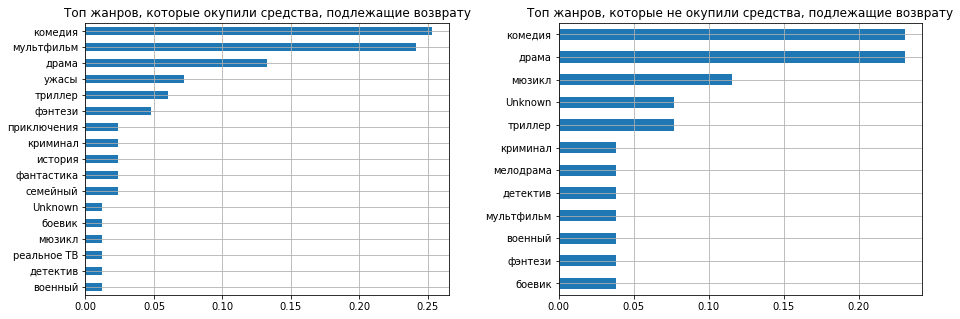

In [192]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_figwidth(15)
fig.set_figheight(5)
plt.subplots_adjust(wspace=0.3, hspace=0.4)

(
    data_gov_cinema.query('refundable_support != 0 and is_refunded == True')
    .genre_main
    .value_counts(ascending=True, normalize=True)
    .plot.barh(ax=ax1)
)
ax1.set_title('Топ жанров, которые окупили средства, подлежащие возврату')
ax1.grid()

(
    data_gov_cinema.query('refundable_support != 0 and is_refunded == False').genre_main
    .value_counts(ascending=True, normalize=True)
    .plot.barh(ax=ax2)
)
ax2.set_title('Топ жанров, которые не окупили средства, подлежащие возврату')
ax2.grid()

Как среди окупивших невозвратные средства, так и среди окупивших, в топе находится комедии (они занимают \~24-25% в обоих выборках).  
Отличие состоит лишь в том, что для окупивших себя фильмов, большую долю занимают мультфильмы(\~24%), в то время как среди неокупившихся фильмов значительную долю  (~24%) занимают драмы.

#### Какую долю в среднем составляют государственные средства в общем бюджете фильма.

Изучим описательные статистики для столбца `share_gov_support` датафрейма `data_gov`

In [193]:
data_gov.share_gov_support.describe()

count    332.000000
mean       0.542139
std        0.197002
min        0.040000
25%        0.380000
50%        0.615000
75%        0.660000
max        1.000000
Name: share_gov_support, dtype: float64

Посмотрим на распределение доли государственных денег в общем бюджете фильма

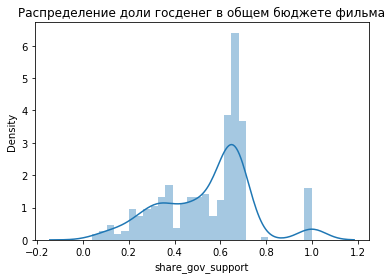

In [194]:
sns.distplot(a=data_gov.share_gov_support, bins=30);
plt.title('Распределение доли госденег в общем бюджете фильма');

**В среднем, в фильмах, которые получили господдержку, доля государственных денег в общем бюджете составляет 61,5% (в соответсвии с медианой).  
Максиальная доля составила 100%, минимальная - 4%**

#### Зависит ли сумма сборов от размера государственной поддержки?

Чтобы посмотреть взаимосвязь количественных факторов с количественными, нам необходимо будет очистить данные в столбцах `box_office` (и в конкретном примере ниже - столбце `gov_money`)

Для этого cоздадим функцию, которая будет принимать на вход столбец Series, а на выходе выдавать минимальный и макисмальные пороги в размере `[Q1 - 1,5*IQR (или min)]` и `[Q3 + 1,5*IQR (или max)]`.  
Таким образом мы сможем увидеть максимальные и минимальные значения, которые будут исключать выбросы. На основе данных значений мы будем делать срез данных для дальнейшего анализа.  

In [195]:
def set_thresh(series):
    Q1 = series.quantile(.25) #25%-й квантиль
    Q3 = series.quantile(.75) #75%-й квантиль
    IQR = Q3 - Q1             #интреквантильный размах

    min_thresh = (Q1 - 1.5 * IQR if Q1 - 1.5 * IQR > series.min() else series.min()) #минимальный порог, исключающий выбросы
    max_thresh = (Q3 + 1.5 * IQR if Q3 + 1.5 * IQR < series.max() else series.max()) #максимальный порог, исключающий выбросы
    return round(min_thresh, 1), round(max_thresh, 1)

Определим границы для столбца `box_office` в датафрейме ``data_gov_cinema``

In [196]:
min_thresh_box_office, max_thresh_box_office = set_thresh(data_gov_cinema.box_office)
min_thresh_box_office, max_thresh_box_office

(1550, 264077507.4)

Определим границы для столбца `gov_money` в датафрейме ``data_gov_cinema``

In [197]:
min_thresh_gov_money, max_thresh_gov_money = set_thresh(data_gov_cinema.gov_money)
min_thresh_gov_money, max_thresh_gov_money

(4700000, 111000000.0)

Для среза, ограниченного данными порогами, построим диаграмму рассеяния.

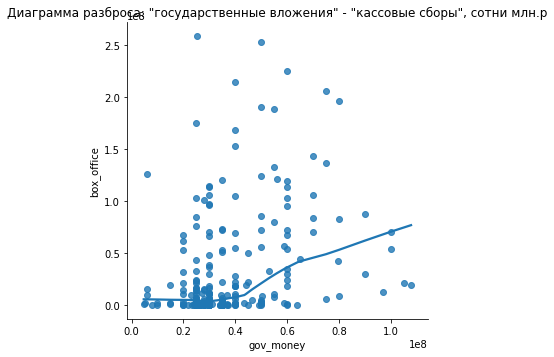

In [198]:
box_office_gov_money_filter = '(@min_thresh_box_office <= box_office <= @max_thresh_box_office) and (@min_thresh_gov_money <= gov_money <= @max_thresh_gov_money)'

sns.lmplot(data=data_gov_cinema
           .query(box_office_gov_money_filter), 
           x='gov_money', 
           y='box_office',
           lowess=True);
plt.title('Диаграмма разброса: "государственные вложения" - "кассовые сборы", сотни млн.р');

На диаграмме наблюдается высокий разброс значений. Линейная зависимость начинает проследиваться с момента, когда величина инвестированных государством средств превышает 40млн.р, однако теснота этой связи крайне мала.  

**Корреляция между сборами, и количеством профинансированных государством денег отсутствует**

#### Исследуем зависимость величины кассовых сборов от размера бюджета фильма.

Посмотрим на диаграмму размаха для столбца `budget`

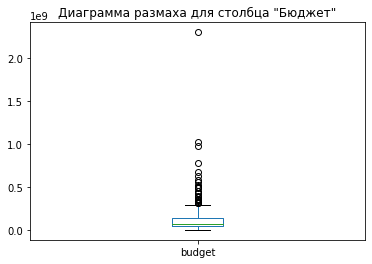

In [199]:
data_gov_cinema.budget.plot.box();
plt.title('Диаграмма размаха для столбца "Бюджет"');

Почистим его также от выбросов.

Определим границы для столбца `budget` в датафрейме `data_gov_cinema`

In [200]:
min_thresh_cinema_budget, max_thresh_cinema_budget = set_thresh(data_gov_cinema.budget)
min_thresh_cinema_budget, max_thresh_cinema_budget

(6000000, 305785290.0)

Вновь построим диаграмму разброса. По оси Х отобразим бюджет фильма, по оси Y - кассовые сборы.

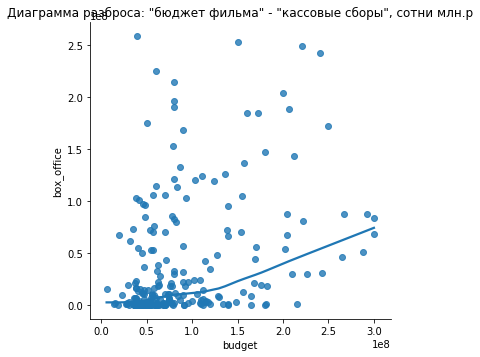

In [201]:
box_office_budget_filter = '(@min_thresh_box_office <= box_office <= @max_thresh_box_office) and (@min_thresh_cinema_budget <= budget <= @max_thresh_cinema_budget)'

sns.lmplot(data=data_gov_cinema.query(box_office_budget_filter), 
           x='budget', 
           y='box_office',
           lowess=True);
plt.title('Диаграмма разброса: "бюджет фильма" - "кассовые сборы", сотни млн.р');

Вновь наблюдаем очень высокий разброс значений. Трудно определиться. Посмотрим на коэффициент корреляции Пирсона.

In [202]:
data_gov_cinema.query(box_office_budget_filter)['box_office'].corr(data_gov_cinema.query(box_office_budget_filter)['budget'])

0.4040013425765643

Можно сказать, что линейная зависимость появляется, когда бюджет фильма становится свыше 100млн.р. Однако теснота это связи настолько мала, что мы не можем говорить о наличии корреляции.

**Корреляция между сборами, и размером бюджета фильма отсутсвует**

#### Есть ли зависимость между величиной сборов и величиной доли государственных денег в бюджете фильма.

Построим диаграмму разброса. По оси Х отобразим долю государственных денег в бюджете фильма, по оси Y - кассовые сборы.

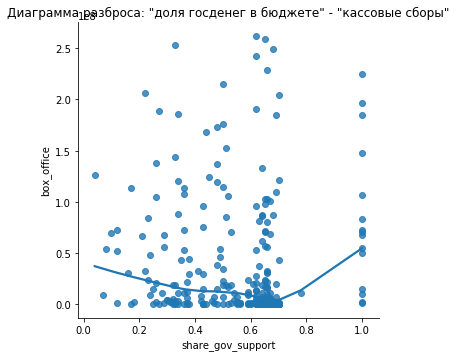

In [203]:
sns.lmplot(data=data_gov_cinema.query('@min_thresh_box_office <= box_office <= @max_thresh_box_office'), 
           x='share_gov_support', y='box_office', lowess=True);
plt.title('Диаграмма разброса: "доля госденег в бюджете" - "кассовые сборы"');

**Линейная зависимось между сборами, и долей государственных денег в бюджете фильма отсутсвует**

#### Резюме

На данном этапе, мы уделили внимание фильмам, получившим поддержку от государства. Для данной категории кинокартин были исследованы кассовые сборы, сумма вложенных средств и степень их возврата. Были получены следующие результаты:
- В 2015 году государство оказало поддержку наибольшему количеству кинокартин (в период с 2013 по 2019 год), их количество составило 86 шт. Наименьшее количество фильмов получило поддержку в 2013 году, таких фильмов оказалось ли 2.
- Средняя сумма, которая выделялась государством на поддержку фильмов составила 35 млн.р. (в соответсвии с медианой), и лишь 25% фильмов получили поддержку свыше 60 млн.р. При этом, диапазон сумм, которые государство вкладывало в фильмы с 2013 по 2019 года составил от 3 до 500 млн.р.
- При этом, дола государственных денег в общем бюджете фильма колеблется от 4% до 100%, и в среднем составляет 61,5% (в соответсвии с медианой). 
- Чаще всего средства выделялись Министерством Культуры. Реже всего фильмы получали одновременно и от Фонда Кино и от Министерства Культуры. При этом, Фондом Кино как правило выделялось в среднем в два раза больше денег, нежели Министерством Культуры (60 млн.р. против 28 млн.р.). Совместно они выделяли в среднем 47,7 млн.р.
- Что касается жанров, к которым чаще всего относились фильмы, то для Фонда Кино и Министерства Культуры они ращличаются. Было выявлено, что Фонд кино в основном отдает предпочтения комедиям и мультфильмам, в то время как Министерство Культуры - драмам (и в меньшей степени комедиям). Совместную поддежку чаще всего получали фильмы из жанра "драма"

Что касается сборов:
- Наибольшие сборы в среднем получали фильмы, которые поддержал Фонд Кино. Они составили 85,9 млн. р. на один фильм. Фильмы, которые получили поддержку Министерства Культуры показали наихудшие результаты - их кассовые сборы в среднем составиди 1,8 млн. р. за фильм.
- В период с 2013 по 2019 год фильмы, получившие поддержку Фонда Кино получили максимальное количество кассовых сборов - 36 млрд. р. Фильмы, которые получили поддержку одновременно от обеих организаций показали наизудший реузльтат - их суммарные сборы за 7 лет составили 805 млн.р.

Что касается окупаемости: 
- Фильмы, получившие поддержку от Фонда Кино в среднем показали окупаемость в размере 40% на вложенные Фондом Кино средства. Что касается средств, подлежащих возврату, то данные вложения окупились у Фонда Кино в 88% случаев, в то время как при совместных инвестициях, возвратные средства окупились лишь в 59%.  
Стоит также отметить, что, поддерживая кинокартины в одиночку, Министерство Культуры за эти семь лет ни разу не выдало материальную помощь на возвратной.  

Возможно, именно с этим отчасти связан тот факт, что фильмы получившие поддержку от Министерства Культуры показали наиболее низкую окупаемость на вложенные средства - она составила -93%, иными словами данные фильмы были убыточны с точки зрения вложенных государством денег.  
- Получается, что Фонд Кино более эффективно вкладывал средства в кинокартины на протяжении этих 7-и лет.

Что касается жанров, к которым относятся фильмы, окупившие деньги, подлежащие возврату:
- Как среди окупивших невозвратные средства, так и среди не окупивших, в топе находится комедии (они занимают ~24\-25% в обоих выборках).
- Отличие состоит лишь в том, что для окупивших себя фильмов, большую долю занимают мультфильмы(\~24%) (как раз таки один из основных жанров, в которые в большей степени инвестировал Фонд Кино), в то время как среди неокупившихся фильмов значительную долю (\~24%) занимают драмы (жанр, в который в большей степени инвестировало Министерство Культуры, а также вкладывались деньги совместно). 
- Помимо прочего, было выявлено, что корреляция между сборами, и количеством профинансированных государством денег, а также размером бюджета фильма - отсутствует. Точнее, в некоторой степени на определенных отрезках она присутсвует и является положительной, но теснота связи настолько слаба, а разброс значений настолько высок - что скорее было бы верно говорить об ее отсутствии.

### Исследуем зависимость рейтинга фильмов, получивших господдержку от различных факторов.

#### Какой рейтинг в среднем получают фильмы, которые получили поддержку от государства. Отличается ли он от среднего рейтинга фильмов, не получивших поддержки государства?

Посмотрим на описательные статистики для рейтинга фильмов, поддержанных государством

In [204]:
data_gov.ratings.describe()

count    314.000000
mean       6.000637
std        1.123948
min        1.000000
25%        5.300000
50%        6.200000
75%        6.700000
max        8.500000
Name: ratings, dtype: float64

Посмотрим на статистики для рейтинга фильмов, не поддержанных государством

In [205]:
data_nongov.ratings.describe()

count    6176.000000
mean        6.503578
std         1.095038
min         1.100000
25%         5.900000
50%         6.600000
75%         7.300000
max         9.200000
Name: ratings, dtype: float64

Посмотрим на распределение рейтинга для обоих категорий.

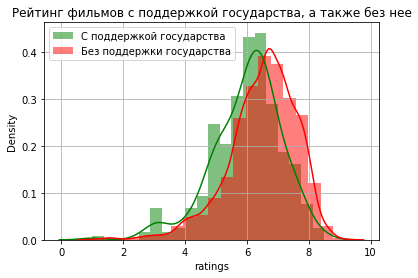

In [206]:
fig, ax = plt.subplots()

sns.distplot(a=data_gov.ratings, hist_kws={'alpha': 0.5}, color='g', bins=20, label='C поддержкой государства');
sns.distplot(a=data_nongov.ratings, hist_kws={'alpha': 0.5}, color='r', bins=20, label='Без поддержки государства');

plt.grid()
plt.legend()
plt.title('Рейтинг фильмов с поддержкой государства, а также без нее');

В качесте показателя рассмотрим среднее арифметическое. Наши распределения напоминают по форме нормальные, с небольшими скосами справа или слева. Взяв за показатели среднее арифметическое, мы можем заложить в результат некоторое отклонение. Плюс, рейтинг - показатель непрерывный. У нас же он указан в виде дискретных значений, поэтому среднее арифметическое в данном случае может быть более информативным.  

**Средний рейтинг для фильмов, получивших государственное финансирование - 6.0, средний рейтинг для остальных фильмов - 6.5.**  
Мы не можем утверждать, что разница статистически значима, но она есть.

#### Есть ли зависимость между рейтингом фильма и организацией, которая поддержала его выход?

Построим сводную таблицу, в которой отобразим средний рейтинг для фильмов, профинансированных каждым из органов.

In [207]:
data_gov.pivot_table(index='financing_source', values='ratings', aggfunc='mean')

,ratings
financing_source,
МК,6.112583
"МК, ФК",6.438095
ФК,5.816901


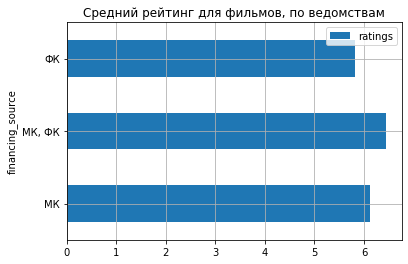

In [208]:
data_gov.pivot_table(index='financing_source', values='ratings', aggfunc='mean').plot.barh();
plt.grid()
plt.title('Средний рейтинг для фильмов, по ведомствам');

Посмотрим как распределены значения на гистограмме.

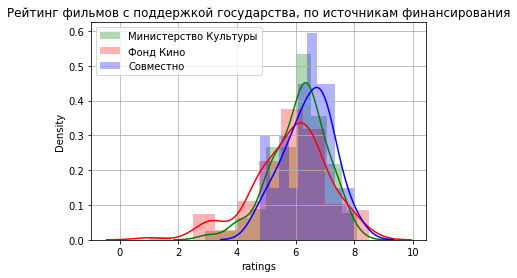

In [209]:
fig, ax = plt.subplots()

sns.distplot(a=data_gov.query('financing_source == "МК"').ratings, 
             hist_kws={'alpha': 0.3}, color='g', bins=10, label='Министерство Культуры');

sns.distplot(a=data_gov.query('financing_source == "ФК"').ratings, 
             hist_kws={'alpha': 0.3}, color='r', bins=10, label='Фонд Кино');

sns.distplot(a=data_gov.query('financing_source == "МК, ФК"').ratings, 
             hist_kws={'alpha': 0.3}, color='b', bins=10, label='Совместно');


plt.grid()
plt.legend()
plt.title('Рейтинг фильмов с поддержкой государства, по источникам финансирования');

**В целом, фильмы поддержанные Министерством Культуры и Фондом Кино имеют приблизительно одинаковый средний рейтинг: 6.1 и 5.8.  
Фильмы, получившие совместную поддержку имеют незначительно больший рейтинг - 6.4**

#### Влияет ли бюджет фильма на его рейтинг?

Посмотрим на диаграмму рассеяния для столбца `budget` датафрейма `data_gov`

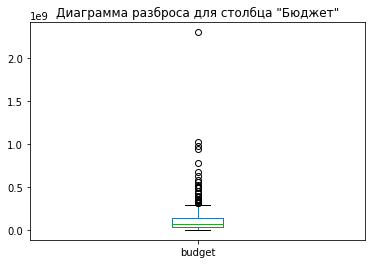

In [210]:
data_gov.budget.plot.box();
plt.title('Диаграмма разброса для столбца "Бюджет"');

Видны выбросы. Для того, чтобы проанализировать корреляцию этого показателя с другими, нам придется провести небольшую очистку. Используем функцию `set_thresh`, получим границы, исключающие выбросы, и на их основании создадим срез данных для анализа.

In [211]:
min_thresh_budget, max_thresh_budget = set_thresh(data_gov.budget)
min_thresh_budget, max_thresh_budget

(6000000, 306712800.8)

Поссмотрим на диаграмму рассеяния для столбца `budget` после очистки от выбросов.

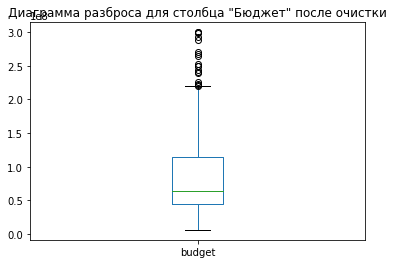

In [212]:
data_gov.query('@min_thresh_budget <= budget <= @max_thresh_budget').budget.plot.box();
plt.title('Диаграмма разброса для столбца "Бюджет" после очистки');

Выглядит по-лучше. С этим можно работать.

Построим диаграмму рассеяние, где по оси Х расположим "Бюджет", а по оси Y - "Рейтинг" фильмов.

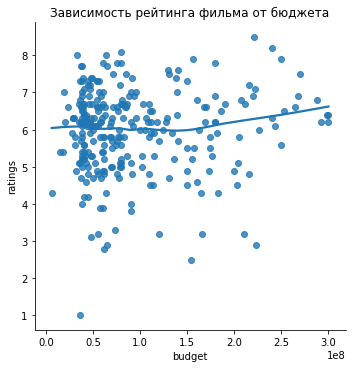

In [213]:
sns.lmplot(data=data_gov.query('@min_thresh_budget <= budget <= @max_thresh_budget'), 
           x='budget', y='ratings', lowess=True);
plt.title('Зависимость рейтинга фильма от бюджета');

Высокий разброс значений на диаграмме рассеяния, линия регрессии практически паралельна оси Х.  
Все это **говорит о том, что между рейтингом фильма и бюджетом нет линейной зависимости**

#### Влияет ли количество денег, вложеных государством на рейтинг фильма?

Посмотрим на диаграмму рассеяния для столбца `budget` датафрейма `data_gov`

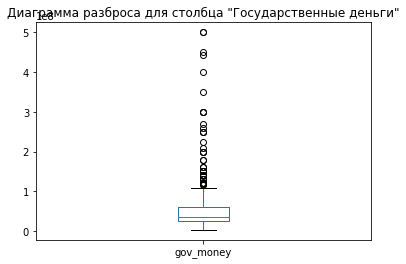

In [214]:
data_gov.gov_money.plot.box();
plt.title('Диаграмма разброса для столбца "Государственные деньги"');

Зададим верзние и нижние границы, исключающие выбросы, для того, чтобы далее на из основании построить срез данных.

In [215]:
min_thresh_gov_money, max_thresh_gov_money = set_thresh(data_gov.gov_money)
min_thresh_gov_money, max_thresh_gov_money

(3000000, 111999375.0)

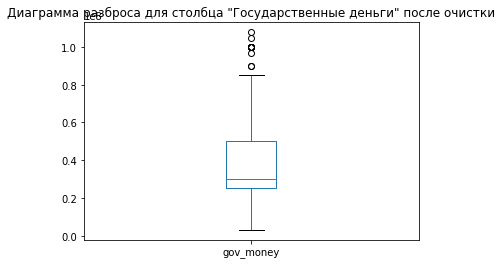

In [216]:
data_gov.query('@min_thresh_gov_money <= gov_money <= @max_thresh_gov_money').gov_money.plot.box();
plt.title('Диаграмма разброса для столбца "Государственные деньги" после очистки');

Построим диаграмму рассеяние, где по оси Х расположим "Государственные деньги", а по оси Y - "Рейтинг" фильмов.

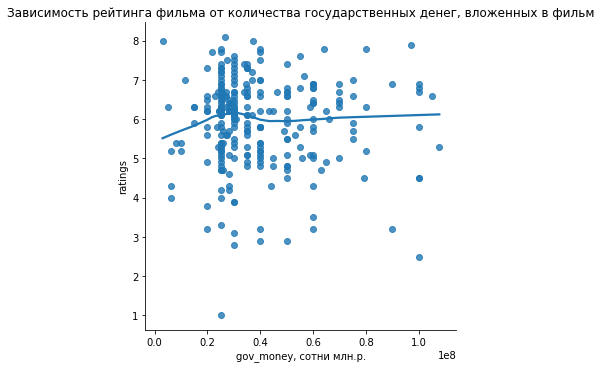

In [217]:
sns.lmplot(data=data_gov.query('@min_thresh_gov_money <= gov_money <= @max_thresh_gov_money'), 
           x='gov_money', y='ratings', lowess=True);
plt.title('Зависимость рейтинга фильма от количества государственных денег, вложенных в фильм');
plt.xlabel('gov_money, сотни млн.р.');

**Рейтинг не зависит от вложенных государством денег.**

#### Влияет ли доля государственных денег в бюджете фильма на его рейтинг?

Посмотрим на график разброса для доли государственных денег в бюджете фильма.

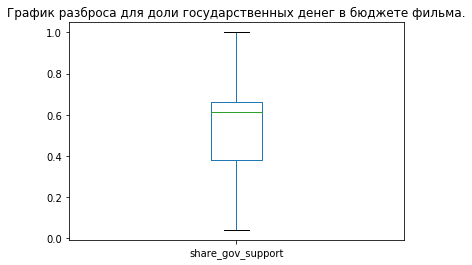

In [218]:
data_gov.share_gov_support.plot.box();
plt.title('График разброса для доли государственных денег в бюджете фильма.');

С такими значениями можно работать.  

Построим диаграмму рассеяния, на которой по оси Х отложим долю государственных денег в бюджете фильма, а по оси Y - рейтинг.

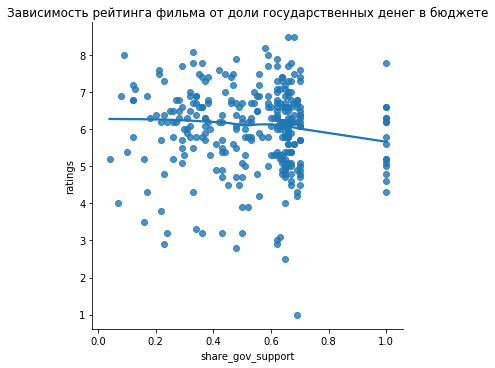

In [219]:
sns.lmplot(data=data_gov, 
           x='share_gov_support', y='ratings', lowess=True);
plt.title('Зависимость рейтинга фильма от доли государственных денег в бюджете');

Вновь наблюдаем высокий разброс значений и линию регрессии практически паралельную оси Y, что в совокупности говорит об **отсутствии линейной связи между рейтингом фильма и доле государственных денег в его бюджете.**

#### Резюме

На данном этапе мы более подробно исследовали рейтинг, которые получили фильмы с государственной поддержкой, а также проверили, что может на него влиять. В результате проведенного исследования были получены следующие результаты:
- Средний рейтинг для фильмов, получивших государственное финансирование составляет 6.0, в то время как средний рейтинг для фильмов, не получивших государственной поддержки немногим выше - 6.5.
- В целом, фильмы получившие финансирование от Министерства Культуры и Фонда Кино имеют приблизительно одинаковый средний рейтинг: 6.1 и 5.8. Фильмы, получившие поддержку одновременно от двух организаций имеют незначительно больший рейтинг - 6.4. В целом, нет оснований утверждать, что одна из организаций финансирует фильмы, которые получают больше одобрения зрителей, нежели другая. 
- Помимо этого, было выявлено, на рейтинг фильма не влияет ни бюджет, ни объем государственного финансирования, ни доля государственных денег в общем бюджете.

## Шаг 5. Общий вывод

**В ходе работы были предприняты следующие шаги:**
- Была осуществлена предобработка данных
- Были добавлены новые признаки, рассчитанные на основании имеющихся данных
- Был произведен исследовательский анализ данных в целом
- Был произведен исследовательский анализ данных в отношении фильмов, получивших материальную поддежрку от Фонда Кино и Министерства Культуры.

**1. В ходе предобработки данных, мы:**
- Объединили данные из разных таблиц в одну
- Изменили формат хранения данных в стобцах, в которых это было необходимо
- Изучили пропуски в данных, попытались понять их причины, а также подобрать замену пропускам там, где это было целесообразно.
- Изучили дубликаты в данных, попытались понять их причины, а также избавились от дубликатов там, где это было возможно и необходимо для целей текущего исследования.
- Изучили категориальные и количественные значения на предмет аномалий. Поправили значения там, где это было возможно.

**2. На этапе добавления новых признаков, были добавлены следующие столбцы:**
- `show_start_year` - год, когда фильм вышел в прокат.
- `director_main` - имя и фамилия главного режиссера
- `genre_main` - основной жанр кинокартины
- `share_gov_support` - доля денег государственной поддержки в общем бюджете фильма

**3. На этапе общего исследовательского анализа данных, мы изучили динамику выхода фильмов в прокат, сборы, а также влияние возрастного ограничения на размер кассовых сборов. Были получены следующие результаты:**
- В целом, несмотря на небольшие перепады, фильмы на протяжении 2010 - 2019 годов выходили равномерно. С 2010 по 2019 года в среднем в прокат выходило 756 фильмов ежегодно.
- Наибольшее количество кинолент вышло в прокат в 2010 году и составило 985 фильмов. Меньше всего кинокартин российский прокат увидел в 2017 году - их количестов составило всего лишь 505 фильмов.
- В отношении уникальных кинолент для каждого года ситуация лишь немногим отличается:
  - 727 уникальных фильмов в среднем выходило в прокат ежегодно
  - Максимальное количество уникальных кинолент было выпущено в прокат в 2019 году
- Лишь 42% кинокартин, из тех, что попали в прокат с 2010 по 2019 год были показаны в кинотеатрах.

Что касается динамики выхода фильмов в прокат в кинотеатрах и полученных сборов, то:
- Максимальное количество фильмов, показанных в кинотеатрах в период с 2010 по 2019 года было зафиксировано в 2019 году. Их количество составило 530 кинолент. Минимальное - в 2010 году, и составило 105 картин соответственно.
- Максимальные сборы в период с 2015 по 2019 года получили фильмы, выпущенные в прокат в кинотеатрах в 2017 году. Сумма сборов для них составила в среднем 9,96 млн.р на один фильм. Минимальные сборы получили фильмы, выпущенные в 2016 году. Для них величина сборов в среднем составила 3,8 млн.р. на один фильм. (в соответсвии с медианой)
- При этом, максимальная сумма сборов, которую получил российский кинопрокат в период с 2015 по 2019 гг пришлась на 2018 год и составила 49,7 млрд. р. суммарно за год. Наименьшая сумма была получена в 2015 году и составила 39 млрд.р за год суммарно для всех фильмов, вышедших в кинотеатры.

Что касается влияния возрастного ограниченения на кассовые сборы фильмов, было установлено, что влияние присутсвует. Было выявлено, что:
- Максимальное количество сборов в среднем на фильм получили кинокартины с возрастным ограничением "6+". Большая часть кинокартин, представленных в данной возрастной категории относилась к жанру "мультфильм" и "художественные фильмы" в соотношении 2 к 1. Минимальное количество сборов в среднем на фильм получили картины с возрастным ограничением "0+". Большая часть лент, представленных в данной возрастной категории относилась как к жанру "мультфильм", так и в значительной степени к жанру "Unknown" и "документальный"
- При этом, если смотреть сумму сборов для кинокартин в разрезе возрастных ограничений в динамике по годам, то в некоторые года картина может отличаться. Это может быть вызвано тем, что в некоторые года в рамках определенного жанра могут выходить фильмы-бестселлеры. Будучи представленными внутри своей возрастной категории, они могут значительно сдвигать график для данной возрастной категории внутри определенного года в большую сторону по сборам. То же справедливо и в обратную сторону.
- Возможно, справедливо было бы утверждать, что влияние на средние сборы для фильма имеет "возрастное ограничение + жанр" кинокартины. Так, для кинокартин, получивших наибольшие средние сборы за 5 лет наиболее характерной оказалась категория "мультфильмы 6+".

**4. На этапе исследовательского анализа фильмов, получивших государственную поддержку, были изучены кассовые сборы, сумма вложенных средств, степень их возврата, а также рейтинг таких фильмов и его взаимозависимость от различных факторов в период с 2013 по 2019 года. Были получены следующие результаты:**  
- Наибольшее количество картин получило поддержку государства в 2015 году и составило 86 фильмов. Наименьшее количество получило финансирование в 2013 году и составило 2 фильма.
- В среднем государство выделяло 35 млн.р. на один фильм (в соответсвии с медианой). Лишь 25% фильмов получили поддержку свыше 60 млн.р. При этом, диапазон сумм, которые государство ввыделяло на финансирование фильмов с 2013 по 2019 года составил от 3 до 500 млн.р.
- Средняя доля государственных средств в общем бюджете фильма составила 61,5%. Минимальная доля составила 4%, в то время как максимальная - 100%.
- Министерство Культуры выделяло средства на поддержку фильмов чаще, чем Фонд Кино. Реже всего авторам кинокартин удавалось получить поддержку от обоих источников.
- При этом Фонд Кино выдел в среднем в 2 раза больше средств, нежели Министерство Культуры (60 млн.р. против 28 млн.р.). Когда фильм получал поддержку от обоих ведомств, то в среднем она составляла 47,7 млн.р.
- Невозвратных средств государство в среднем выделяло в 1.3 раза больше и в 3 раза чаще, нежели возвратных.
- Фонд Кино и Министерства Культуры как правило отдавали предпочтения фильмам разных жанров. Фонд кино в основном предпочитал поддерживать комедии и мультфильмы, в то время как Министерство Культуры - драмы. При этом, совместную поддежку чаще всего получали фильмы из жанра "драма"

Что касается сборов:
- Наибольшие сборы в среднем получали фильмы, которые поддержал Фонд Кино. Они составили в среднем 85,9 млн. р. на один фильм. Кинокартины, которые получили поддержку Министерства Культуры показали наихудшие результаты - их кассовые сборы в среднем составиди 1,8 млн. р. на 1 фильм.
- Максимальное количество сборов за 7 лет получили фильмы, профинансированные Фондом Кино. Сумма полученных сборов составила 36 млрд. р. Наихудший результат показали фильмы, получившие средства одновременно от обеих организаций: их суммарные сборы за 7 лет составили 805 млн.р.

Что касается окупаемости: 
- Кинокартины, получившие поддержку от Фонда Кино в среднем показали окупаемость в размере 40% на вложенные Фондом Кино средства. Что касается средств, подлежащих возврату - для Фонда Кино они окупились в 88% случаев. Когда фильм получал поддержку от обоих ведомств, возвратные средства окупались лишь в 59% случаев.
- Министерство культуры за 7 лет ни разу не выдавало деньги, подлежащие возврату (в отношении фильмов, которых оно поддерживало в одиночку). 
- Возможно, с этим отчасти связан тот факт, что фильмы получившие поддержку от Министерства Культуры показали наиболее низкую окупаемость на вложенные средства: -93%. С точки зрения вложенных государством денег, данные фильмы были убыточны.   
- С определенной доле уверенности, можно утверждать, что Фонд Кино более эффективно вкладывал средства в кинокартины на протяжении этих 7-и лет, нежели Министерство Культуры.

Что касается наиболее характерных жанров, к которым относятся фильмы, окупившие возвратные средства:
- Как среди окупивших невозвратные средства, так и среди не окупивших, в топе находится комедии (они занимают ~ 24-25% в обоих выборках).
- Отличие состоит лишь в том, что для окупивших вовратные средства фильмов, большую долю занимают мультфильмы(\~24%) (один из характерных жанров для картин, в которые инвестировал Фонд Кино)
- Среди неокупивших возвратные средства фильмов значительную долю (\~24%) занимают драмы (жанр, в большей степени характерный для кинокартин, в которые инвестировало Министерство Культуры, а также вкладывались деньги совместно). 
- Помимо прочего, было выявлено, что корреляция между сборами, и количеством профинансированных государством денег, а также размером бюджета фильма - отсутствует. Точнее, в некоторой степени на определенных отрезках она присутсвует и является положительной, но теснота связи настолько слаба, а разброс значений настолько высок - что скорее было бы верно говорить об ее отсутствии.

Что касается рейтинга фильмов, получивших государственную поддержку, а также его взаимосвязи с другими признаками:
- Средний рейтинг для фильмов, получивших государственное финансирование составляет 6.0. Средний рейтинг для фильмов, не получивших государственной поддержки немногим выше - 6.5. Мы не можем утверждать, что различие статистически значимо, но оно присутсвует.
- Фильмы получившие финансирование от Министерства Культуры и Фонда Кино имеют приблизительно одинаковый средний рейтинг: 6.1 и 5.8. Пр этом, кинокартины, которые получили поддержку одновременно от двух организаций имеют незначительно более высокий показатель - 6.4. В целом, несмотря на некоторую разницу, нет достаточных оснований утверждать, что одна из организаций финансирует фильмы, которые получают больше одобрения зрителей, нежели другая.
- Ни бюджет, ни размер государственного финансирования, ни доля государственных денег в общем бюджете фильма не коррелируеют с рейтингом, который получил фильм.